# FORCASTING US-HTG EXCHANGE RATE IN HAITI IN A CONTEXT OF CRISES.- A Machine Learning Approach

_By: **Grégory PINCHINAT**_

Wednesday, August 12, 2020

---

## _Table of Contents_

[INTRODUCTION](#intro)
+ [Background](#backg)
+ [Interest](#interest)
+ [Objective](#obj)

[RESEARCH QUESTION](#research-quest)

[HYPOTHESES](#hypo)

[DATA SOURCES](#data)

[I. DATA WRANGLING](#wrangle)
+ [A. Data Loading & Cleaning](#loading-clean)
+ [B. Data Transformation](#data-trans)
+ [C. Functions](#functions)

[II. EXPLORATORY DATA ANALYSIS](#eda)
+ [A. Descriptive Statistics](#describe)
+ [B. Bivariate Analysis](#bi-anal)

[III. MULTIVARIATE TIME SERIES ANALYSIS](#multi-var)

+ [III.1.- MULTIVARIATE TIME SERIES ANALYSIS (with Flights Data)](#multi-anal)

    + [A. Stationarity](#stationarity)
    + [B. Long-Term Correlations](#granger-johansen)
    + [C. Modelling & Forecasting](#model-predict)


+ [III.2.- MULTIVARIATE TIME SERIES ANALYSIS (without Flights Data)](#multi-anal2)
    + [A. Stationarity](#stationarity2)
    + [B. Long-Term Correlations](#granger-johansen2)
    + [C. Modelling & Forecasting](#model-predict2)
    
    
[CONCLUSION]

---

### INTRODUCTION <a name="intro"></a>

#### _Background_ <a name="backg"></a>
The Haitian Gourde is unfortunately unstable. The State is not acting efficiently in terms of public policies in order to control its fluctuations. This has caused the agents to be speculating, with uncertainty. Many have chosen to have a Bank Account in US Dollars in order to protect their finances from this unstability. I have tried it, too. But the banks are rough on their customers. So, I don't exactly believe this is quite a solution, unless you're saving on a very long term.

Pretending the dollar is too scarce to be given back, the banks get to decide any time of the limit amount of dollars a customer may debit from their own account. They will be required to buy the difference at a higher price in gourdes than the dollar was worth some days ago or even some hours ago. The spread is large and the more you have to buy, the higher the spread. This means, you're very likely to lose, all the more if you're saving dollars at a bank in the short run!

#### _Interest_ <a name="interest"></a>
As a customer of several banks, that was definitely a problem to me, and I decided to use Data Science and try to solve it. One of the best ideas was inspired to me by a friend. I went to borrow some money from him. He insisted on giving me the closest amount of US Dollars worth the amount of Gourdes I asked for, and required that I reimburse in US Dollars or its value in Gourdes based on the exchange rate on the day of reimbursement.

I told him: _"But, I'll be reimbursing you in two months. What if the rate goes down? You might suffer a loss."_ He said: _"I know. But the rate is more likely to go up, because it has never gone down since 2018 at most!"_ I realized at that time that he had a point, and I told myself: _"What if I got into the business of lending people money in US Dollars, and exchanging US to gourdes (and vice versa) at a slightly lower rate than that of the banks'?"_ 

#### _Objective_ <a name="obj"></a>
Since I am also an Applied Economist, I knew that I had to keep track of how the rates would vary in the closest future, each time I would grant a loan to be recovered after a given period of time in the year. I also knew that other variables of human daily activity could explain how the rates vary over time. The goal is to look at how those variables impact each other, and try to use most or all of them to predict the US-Gourde Exchange Rate's future values confidently.

### RESEARCH QUESTION <a name="research-quest"></a>

_How will the US-Gourde Exchange Rate vary over the next few months, given (or not) other variables of daily human activity to which it might be related?_

### HYPOTHESES <a name="hypo"></a>
+ The Exchange Rate will keep on growing continuously


+ The USA's Imports from Haiti should logically cause the Exchange Rate to go down, with more dollars entering in Haiti.


+ The USA's Exports to Haiti should make the Exchange Rate spike for the adverse reason.


+ The Transfers received from abroad should increase to support economic and social shocks. 


+ The Inflation should spike when the exchange rates spike.


+ The Embarkment onboard regular flights leaving Haiti are expected to spike in moments of crises, meaning when the Exchange Rate and the Inflation are continuously increasing, and also in holiday times when people come over from abroad to see family.


+ The Debarkment out of regular flights should decrease with those economic and social crises, while maintaining their level in Holiday times when people go abroad to spend their vacations. 

### DATA SOURCES <a name="data"></a>

All the data have been collected on a monthly basis. The variables that have been kept for the study are:
+ The USD-HTG Exchange Rate: `end_rate`, which represents the value of 1 US Dollar in terms of Haitian Gourdes at the end of each month;


+ The USA's Imports from Haiti and the USA's Exports to Haiti: `us_imp_ht` and `us_exp_ht`, which represent respectively values in US dollars of US' Imports and Exports with Haiti. Those Imports and Exports have been used as a proxy for the Real GDP, whose records of Monthly values couldn't be found. Actually, 76% of Haiti's GDP is imputable to its trade with other countries [(World Bank, 2018)](https://import-export.societegenerale.fr/en/country/haiti/trade-country-risk). The USA are Haiti's first trade partner, with 84% of Haitian Exports heading straight to the USA and 20% of Haitian Exports (the highest), coming from the USA. 


+ Inflation: `inf`, which is the percent change in Haiti's Consumer Price Index, relative to same month of previous year.


+ The Received Remittances: `rec_rem`, which are the total money transfers received by Haitian households from agents living abroad in various countries. The Central Bank keeps records of formal remittances and informal remittances, the total mentioned herein is the sum of both formal and informal remittances.


+ The flow of passengers from incoming and outgoing regular flights recorded by the Autorité Aéroportuaire Nationale: `int_reg_deb` and `int_reg_emb`.


A [previous study](http://ctrc.sice.oas.org/trc/Articles/IMF_data/Haiti.pdf) published by the IMF and adopting a similar methodology has given quite a lot of guidance on the choice of those variables. Then proxies have been determined to eliminate the problem of data availability. The final variables that will be used to carry the study have mostly been obtained from the linked sources below: 
+ [Haiti Open Data's website](http://opendata.investhaiti.ht/ueujxy/imf-world-economic-outlook-weo-april-2020)
+ [The IMF](https://www.imf.org/external/pubs/ft/weo/2020/01/weodata/download.aspx)
+ [The World Bank](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG)
+ [Haiti's Central Bank](brh.ht)
+ Haiti's National Airport Administration
+ [USA's Census Bureau](https://www.census.gov/foreign-trade/balance/c2450.html)

These organizations are supposed to be run by experts, to produce and collect data worldwide in order to make them available and open to anyone who need to make any research. They definitely should be trusted on being reliable. In the next sections, these data will loaded, cleaned and analyzed.

---

### I. DATA WRANGLING <a name="wrangle"></a>

### A.- Data Loading & Cleaning <a name="loading-clean"></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

In [2]:
url1 = 'datasets/Monthly-BRH-US-HTG.xlsx'
url2 = 'datasets/Monthly-HOD-BRH-INF.xlsx'
url3 = 'datasets/Received-remittances.xlsx'
url4_5 = 'datasets/Monthly-US-IMP-FROM-EXP-TO-HT.xlsx'
url6_7 = 'datasets/_PAP AAN stats 2014 thru MAI 2019.xlsx'

In [3]:
exch = pd.read_excel(url1)
exch.head()

,Date,Taux Moyen mensuel,Taux de fin de periode
0,1990-10-01,n/d,7.805
1,1990-11-01,n/d,8.150
2,1990-12-01,n/d,7.850
3,1991-01-01,n/d,7.670
4,1991-02-01,n/d,7.725


In [4]:
exch.drop(exch.columns[1], axis=1, inplace=True)

In [5]:
exch.head()

,Date,Taux de fin de periode
0,1990-10-01,7.805
1,1990-11-01,8.150
2,1990-12-01,7.850
3,1991-01-01,7.670
4,1991-02-01,7.725


In [6]:
exch.rename(columns={exch.columns[1]: 'end_rate'}, inplace=True)

In [7]:
exch.head()

,Date,end_rate
0,1990-10-01,7.805
1,1990-11-01,8.150
2,1990-12-01,7.850
3,1991-01-01,7.670
4,1991-02-01,7.725


In [8]:
exch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 2 columns):
Date        358 non-null datetime64[ns]
end_rate    358 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


In [9]:
inf = pd.read_excel(url2)
inf

,Indicator,Indicator Name,Indicator - French Name,Indicator - Note,Measure,Measure Name,Measure - French Name,Measure - Units,Scale,Units,1999M11,1999M12,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,2003M5,2003M6,2003M7,2003M8,2003M9,2003M10,2003M11,2003M12,2004M1,2004M2,2004M3,2004M4,2004M5,2004M6,2004M7,2004M8,2004M9,2004M10,2004M11,2004M12,2005M1,2005M2,2005M3,2005M4,2005M5,2005M6,2005M7,2005M8,2005M9,2005M10,2005M11,2005M12,2006M1,2006M2,2006M3,2006M4,2006M5,2006M6,2006M7,2006M8,2006M9,2006M10,2006M11,2006M12,2007M1,2007M2,2007M3,2007M4,2007M5,2007M6,2007M7,2007M8,2007M9,2007M10,2007M11,2007M12,2008M1,2008M2,2008M3,2008M4,2008M5,2008M6,2008M7,2008M8,2008M9,2008M10,2008M11,2008M12,2009M1,2009M2,2009M3,2009M4,2009M5,2009M6,2009M7,2009M8,2009M9,2009M10,2009M11,2009M12,2010M1,2010M2,2010M3,2010M4,2010M5,2010M6,2010M7,2010M8,2010M9,2010M10,2010M11,2010M12,2011M1,2011M2,2011M3,2011M4,2011M5,2011M6,2011M7,2011M8,2011M9,2011M10,2011M11,2011M12,2012M1,2012M2,2012M3,2012M4,2012M5,2012M6,2012M7,2012M8,2012M9,2012M10,2012M11,2012M12,2013M1,2013M2,2013M3,2013M4,2013M5,2013M6,2013M7,2013M8,2013M9,2013M10,2013M11,2013M12,2014M1,2014M2,2014M3,2014M4,2014M5,2014M6,2014M7,2014M8,2014M9,2014M10,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,2020M3,2020M4,2020M5,2020M6,2020M7
0,KN.A2,General Consumer Price Index,Indice général des prix à la consommation,The weighted combination of all other indexes.,KN.B2,Monthly Inflation Rate,Variation en % sur un mois,%,units,%,0.564196,0.717535,1.153323,0.925022,2.629778,0.79366,0.302458,0.240245,0.872334,1.230196,3.944204,2.982166,1.120847,1.151785,0.748523,0.842478,0.780015,0.538635,1.037367,-0.024690,-0.036019,0.850031,0.934176,1.185752,0.642465,1.113984,0.481341,0.733379,1.213619,0.330963,0.455852,0.853685,1.007232,1.443183,1.365823,2.064441,1.518591,2.736813,6.815984,3.591478,3.222094,2.155330,1.363575,1.547773,0.789550,3.389130,3.420122,1.524838,1.508228,1.523773,1.360783,1.557590,2.925487,4.452542,1.404534,0.540928,0.234324,0.427116,2.395974,0.568455,0.558412,1.300339,1.959845,1.071501,1.034392,1.003784,1.808058,1.245319,0.947457,1.057086,1.379310,0.935374,1.179444,0.749376,1.239669,1.714286,1.043339,0.873709,1.023622,0.155885,0.622568,0.696056,1.536098,0.378215,0.226074,0.375940,0.524345,0.819672,0.517369,0.882353,1.311953,0.863309,-0.499287,0.430108,1.784440,0.631136,1.254355,1.032347,1.498638,1.610738,4.491413,1.049305,0.550482,0.951848,1.682381,0.909091,2.582583,-0.819672,-2.361275,-2.237001,-0.432900,-0.434783,-0.311915,0.125156,0.062500,0.312305,0.186800,0.621504,0.617665,0.368324,0.366972,0.548446,3.515152,-1.288056,0.533808,0.353982,0.176367,0.176056,-0.058582,0.000000,-0.058617,0.293255,0.877193,1.565217,1.141553,1.241535,1.282051,0.990644,0.653951,1.082837,0.053562,0.107066,0.641711,0.318810,0.211864,0.264271,0.632578,0.261917,0.365726,0.676731,0.465357,0.823469,0.408372,0.864260,1.058468,0.598504,0.793257,0.393507,0.293974,0.439668,0.583658,0.338491,0.481928,0.047962,0.095877,0.287356,0.095511,0.238550,0.095193,0.380409,0.236855,0.283554,0.612630,0.562061,0.536119,0.679505,0.728074,0.502513,0.363636,0.634058,0.540054,0.581916,0.400534,0.265957,0.442087,0.484155,0.832238,1.911381,2.003410,1.462599,1.194399,1.017501,0.765512,1.079568,1.068038,1.252446,0.850406,0.843235,0.684151,0.868252,1.122754,0.962250,1.319648,1.772793,1.493068,1.190893,

In [10]:
inf = inf.loc[1, '2000M10': '2020M5']

In [11]:
exch['inf'] = np.nan
for i in range(len(inf)):
    exch.loc[120+i, 'inf'] = inf[i]

In [12]:
exch

,Date,end_rate,inf
0,1990-10-01,7.8050,NaN
1,1990-11-01,8.1500,NaN
2,1990-12-01,7.8500,NaN
3,1991-01-01,7.6700,NaN
4,1991-02-01,7.7250,NaN
5,1991-03-01,7.9650,NaN
6,1991-04-01,7.5250,NaN
7,1991-05-01,7.4500,NaN
8,1991-06-01,7.5900,NaN
9,1991-07-01,7.3300,NaN


In [13]:
trans = pd.read_excel(url3, sheet_name='transfers')
trans.head()

,Unnamed: 0,tot_in_formal
0,2009M10,1.162961e+08
1,2009M11,1.020740e+08
2,2009M12,1.480573e+08
3,2010M1,1.089251e+08
4,2010M2,1.525305e+08


In [14]:
trans.tail()

,Unnamed: 0,tot_in_formal
121,2019M11,2.400336e+08
122,2019M12,3.703876e+08
123,2020M1,2.518831e+08
124,2020M2,2.725441e+08
125,2020M3,3.014705e+08


In [15]:
exch['rec_rem'] = np.nan
for i in range(len(trans)):
    exch.loc[228+i, 'rec_rem'] = trans.loc[i, 'tot_in_formal']

In [16]:
exch

,Date,end_rate,inf,rec_rem
0,1990-10-01,7.8050,NaN,NaN
1,1990-11-01,8.1500,NaN,NaN
2,1990-12-01,7.8500,NaN,NaN
3,1991-01-01,7.6700,NaN,NaN
4,1991-02-01,7.7250,NaN,NaN
5,1991-03-01,7.9650,NaN,NaN
6,1991-04-01,7.5250,NaN,NaN
7,1991-05-01,7.4500,NaN,NaN
8,1991-06-01,7.5900,NaN,NaN
9,1991-07-01,7.3300,NaN,NaN


In [17]:
imex = pd.read_excel(url4_5, sheet_name='im_ex')
imex.head()

,date,US_IMP_HT,US_EXP_HT
0,1985M1,31.2,31.2
1,1985M2,30.4,31.8
2,1985M3,36.7,31.9
3,1985M4,33.2,32.9
4,1985M5,31.0,35.3


In [18]:
imex['Date'] = np.nan
for i in range(len(exch)):
    imex.loc[69+i, 'Date'] = exch.loc[i, exch.columns[0]]
    
imex['end_rate'] = np.nan
for i in range(len(exch)):
    imex.loc[69+i, 'end_rate'] = exch.loc[i, 'end_rate']
    
imex['inf'] = np.nan
for i in range(len(exch)):
    imex.loc[189-120+i, 'inf'] = exch.loc[i, 'inf']
    
imex['rec_rem'] = np.nan
for i in range(len(trans)):
    imex.loc[297+i, 'rec_rem'] = trans.loc[i, 'tot_in_formal']

In [19]:
imex.head()

,date,US_IMP_HT,US_EXP_HT,Date,end_rate,inf,rec_rem
0,1985M1,31.2,31.2,NaN,NaN,NaN,NaN
1,1985M2,30.4,31.8,NaN,NaN,NaN,NaN
2,1985M3,36.7,31.9,NaN,NaN,NaN,NaN
3,1985M4,33.2,32.9,NaN,NaN,NaN,NaN
4,1985M5,31.0,35.3,NaN,NaN,NaN,NaN


In [20]:
imex.tail()

,date,US_IMP_HT,US_EXP_HT,Date,end_rate,inf,rec_rem
427,2020M8,0.0,0.0,NaN,NaN,NaN,NaN
428,2020M9,0.0,0.0,NaN,NaN,NaN,NaN
429,2020M10,0.0,0.0,NaN,NaN,NaN,NaN
430,2020M11,0.0,0.0,NaN,NaN,NaN,NaN
431,2020M12,0.0,0.0,NaN,NaN,NaN,NaN


In [21]:
imex.drop(imex.index[432:], inplace=True)

In [22]:
imex

,date,US_IMP_HT,US_EXP_HT,Date,end_rate,inf,rec_rem
0,1985M1,31.200000,31.200000,NaN,NaN,NaN,NaN
1,1985M2,30.400000,31.800000,NaN,NaN,NaN,NaN
2,1985M3,36.700000,31.900000,NaN,NaN,NaN,NaN
3,1985M4,33.200000,32.900000,NaN,NaN,NaN,NaN
4,1985M5,31.000000,35.300000,NaN,NaN,NaN,NaN
5,1985M6,39.600000,28.800000,NaN,NaN,NaN,NaN
6,1985M7,30.200000,33.300000,NaN,NaN,NaN,NaN
7,1985M8,30.600000,34.400000,NaN,NaN,NaN,NaN
8,1985M9,27.200000,29.700000,NaN,NaN,NaN,NaN
9,1985M10,32.400000,45.100000,NaN,NaN,NaN,NaN


In [23]:
aan = pd.read_excel(url6_7, sheet_name='regular_passengers')
aan.head()

,Unnamed: 0,INT_REG_DEB,INT_REG_EMB
0,2014M1,44891,56478
1,2014M2,41446,41646
2,2014M3,52201,57193
3,2014M4,47486,51378
4,2014M5,42911,51720


In [24]:
imex['int_reg_deb'] = np.nan
for i in range(len(aan)):
    imex.loc[348+i, 'int_reg_deb'] = aan.loc[i, 'INT_REG_DEB']
    
imex['int_reg_emb'] = np.nan
for i in range(len(aan)):
    imex.loc[348+i, 'int_reg_emb'] = aan.loc[i, 'INT_REG_EMB']

In [25]:
imex

,date,US_IMP_HT,US_EXP_HT,Date,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
0,1985M1,31.200000,31.200000,NaN,NaN,NaN,NaN,NaN,NaN
1,1985M2,30.400000,31.800000,NaN,NaN,NaN,NaN,NaN,NaN
2,1985M3,36.700000,31.900000,NaN,NaN,NaN,NaN,NaN,NaN
3,1985M4,33.200000,32.900000,NaN,NaN,NaN,NaN,NaN,NaN
4,1985M5,31.000000,35.300000,NaN,NaN,NaN,NaN,NaN,NaN
5,1985M6,39.600000,28.800000,NaN,NaN,NaN,NaN,NaN,NaN
6,1985M7,30.200000,33.300000,NaN,NaN,NaN,NaN,NaN,NaN
7,1985M8,30.600000,34.400000,NaN,NaN,NaN,NaN,NaN,NaN
8,1985M9,27.200000,29.700000,NaN,NaN,NaN,NaN,NaN,NaN
9,1985M10,32.400000,45.100000,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
imex.drop('Date', axis=1, inplace=True)
imex.head()

,date,US_IMP_HT,US_EXP_HT,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
0,1985M1,31.2,31.2,NaN,NaN,NaN,NaN,NaN
1,1985M2,30.4,31.8,NaN,NaN,NaN,NaN,NaN
2,1985M3,36.7,31.9,NaN,NaN,NaN,NaN,NaN
3,1985M4,33.2,32.9,NaN,NaN,NaN,NaN,NaN
4,1985M5,31.0,35.3,NaN,NaN,NaN,NaN,NaN


In [27]:
imex['US_IMP_HT'] = imex['US_IMP_HT']*(10**6)
imex['US_EXP_HT'] = imex['US_EXP_HT']*(10**6)

In [28]:
imex['date'] = pd.date_range(start='Jan 1985', periods = len(imex), freq='M')

In [29]:
imex.head()

,date,US_IMP_HT,US_EXP_HT,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
0,1985-01-31,31200000.0,31200000.0,NaN,NaN,NaN,NaN,NaN
1,1985-02-28,30400000.0,31800000.0,NaN,NaN,NaN,NaN,NaN
2,1985-03-31,36700000.0,31900000.0,NaN,NaN,NaN,NaN,NaN
3,1985-04-30,33200000.0,32900000.0,NaN,NaN,NaN,NaN,NaN
4,1985-05-31,31000000.0,35300000.0,NaN,NaN,NaN,NaN,NaN


In [30]:
imex.tail()

,date,US_IMP_HT,US_EXP_HT,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
427,2020-08-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN
428,2020-09-30,0.0,0.0,NaN,NaN,NaN,NaN,NaN
429,2020-10-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN
430,2020-11-30,0.0,0.0,NaN,NaN,NaN,NaN,NaN
431,2020-12-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [31]:
imex.head(24)

,date,US_IMP_HT,US_EXP_HT,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
0,1985-01-31,31200000.0,31200000.0,NaN,NaN,NaN,NaN,NaN
1,1985-02-28,30400000.0,31800000.0,NaN,NaN,NaN,NaN,NaN
2,1985-03-31,36700000.0,31900000.0,NaN,NaN,NaN,NaN,NaN
3,1985-04-30,33200000.0,32900000.0,NaN,NaN,NaN,NaN,NaN
4,1985-05-31,31000000.0,35300000.0,NaN,NaN,NaN,NaN,NaN
5,1985-06-30,39600000.0,28800000.0,NaN,NaN,NaN,NaN,NaN
6,1985-07-31,30200000.0,33300000.0,NaN,NaN,NaN,NaN,NaN
7,1985-08-31,30600000.0,34400000.0,NaN,NaN,NaN,NaN,NaN
8,1985-09-30,27200000.0,29700000.0,NaN,NaN,NaN,NaN,NaN
9,1985-10-31,32400000.0,45100000.0,NaN,NaN,NaN,NaN,NaN


In [32]:
imex.rename(columns={'US_IMP_HT':'us_imp_ht', 'US_EXP_HT': 'us_exp_ht'}, inplace=True)

In [33]:
new_columns = ['date','end_rate', 'inf', 'rec_rem', 'us_imp_ht', 'us_exp_ht', 'int_reg_deb', 'int_reg_emb']
imex=imex[new_columns]

In [34]:
imex.to_excel('results/USHTG_rate_and_features.xlsx')

In [35]:
df = imex.copy()

In [36]:
df.dropna(subset=['int_reg_emb'], inplace=True)

In [37]:
df.head()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
348,2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
349,2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
350,2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
351,2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
352,2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
df.head()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
0,2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
1,2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
2,2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
3,2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
4,2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


In [40]:
df.tail()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
60,2019-01-31,81.0353,15.5,2.440045e+08,64960550.0,88983423.0,49225.0,56085.0
61,2019-02-28,82.0249,17.0,2.423867e+08,65624992.0,92832684.0,23682.0,33880.0
62,2019-03-31,82.6061,16.7,3.238851e+08,104189527.0,144930934.0,37335.0,38839.0
63,2019-04-30,86.0961,17.7,3.068589e+08,103425157.0,132519689.0,37295.0,38291.0
64,2019-05-31,92.5356,18.0,2.966206e+08,101016899.0,135071227.0,38412.0,46107.0


In [41]:
 df.to_excel('results/USHTG_rate_and_features_NA_removed.xlsx')

### B. Data Transformations <a name="data-trans"></a>

#### 1. With Flights

Make the dates become the indexes and store as `dg`:

In [42]:
dg = df.groupby(['date']).mean()

Transform data to neperian-logarithmic scale and store as `logdf`. First, let's check whether there is any null or negative values:

In [43]:
# First we check if any value is negative or null
df[df.iloc[:,1:]<=0].count()

date           0
end_rate       0
inf            0
rec_rem        0
us_imp_ht      0
us_exp_ht      0
int_reg_deb    0
int_reg_emb    0
dtype: int64

Since there are no negative nor null values, the transformation is possible. We still want to keep the dates as indices instead of the regular integers:

In [44]:
logdf = np.log(df.groupby('date').mean())
logdf.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2014-01-31,3.784533,1.215146,18.712634,17.618687,18.410549,10.711993,10.941606
2014-02-28,3.792065,1.166307,18.939339,18.095680,18.195298,10.632147,10.636961
2014-03-31,3.800112,1.175526,19.096590,18.021210,18.668569,10.862857,10.954187
2014-04-30,3.806516,1.244120,19.007720,18.082073,18.351395,10.768190,10.846965
2014-05-31,3.792228,1.260074,18.958626,18.155137,18.668089,10.666883,10.853600


We can't use `train_test_split`, because this method shuffles the dates at random. We are looking forward to predict from one date to another. Since we're dealing with a VAR and we have quite a few observation, we will use the last 5 observations for forcasting (test_set) and the first 58 as train_set.

In [228]:
Xtrain = logdf[0:-3] 
Xtest = logdf[-3:]

Xtrain.shape, Xtest.shape

((62, 7), (3, 7))

In [229]:
Xtrain.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2014-01-31,3.784533,1.215146,18.712634,17.618687,18.410549,10.711993,10.941606
2014-02-28,3.792065,1.166307,18.939339,18.095680,18.195298,10.632147,10.636961
2014-03-31,3.800112,1.175526,19.096590,18.021210,18.668569,10.862857,10.954187
2014-04-30,3.806516,1.244120,19.007720,18.082073,18.351395,10.768190,10.846965
2014-05-31,3.792228,1.260074,18.958626,18.155137,18.668089,10.666883,10.853600


In [230]:
Xtest.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2019-03-31,4.414084,2.815409,19.595899,18.461722,18.791768,10.527687,10.56718
2019-04-30,4.455464,2.873565,19.541899,18.454359,18.702242,10.526615,10.55297
2019-05-31,4.527593,2.890372,19.507964,18.430798,18.721313,10.556125,10.73872


#### 2. Without Flights

In [231]:
newdf = imex.iloc[297:423, :-2].reset_index(drop=True)
newdf.head()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
0,2009-10-31,42.0271,-3.482881,1.162961e+08,44521535.0,63380599.0
1,2009-11-30,42.2804,-0.785973,1.020740e+08,45992225.0,66674769.0
2,2009-12-31,42.0193,2.040816,1.480573e+08,48666202.0,61489259.0
3,2010-01-31,38.7000,6.086957,1.089251e+08,6401135.0,80661141.0
4,2010-02-28,38.6375,5.177792,1.525305e+08,29396001.0,126351030.0


In [232]:
newdf.tail()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
121,2019-11-30,91.7155,20.4,2.400336e+08,75335486.0,60659515.0
122,2019-12-31,91.9842,20.8,3.703876e+08,83604830.0,91001715.0
123,2020-01-31,92.7940,20.7,2.518831e+08,57704363.0,95754798.0
124,2020-02-29,94.7716,20.8,2.725441e+08,79661596.0,100645336.0
125,2020-03-31,97.9700,22.0,3.014705e+08,89632097.0,121447966.0


In [233]:
# First we check if any value is negative or null
newdf[newdf.iloc[:,1:]<=0].count()

date         0
end_rate     0
inf          2
rec_rem      0
us_imp_ht    0
us_exp_ht    0
dtype: int64

In [234]:
newdf[newdf.loc[:,'inf']<=0].head(2)

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
0,2009-10-31,42.0271,-3.482881,1.162961e+08,44521535.0,63380599.0
1,2009-11-30,42.2804,-0.785973,1.020740e+08,45992225.0,66674769.0


Since the two values where the data (`inflation`) are negative or null ot on the first two dates of the dataset, the neperian-logarithmic transformation is still possible if we agree on rejecting those two observation:

In [235]:
newdf = newdf.drop(newdf.index[:2]).reset_index(drop=True)
newdf.head()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
0,2009-12-31,42.0193,2.040816,1.480573e+08,48666202.0,61489259.0
1,2010-01-31,38.7000,6.086957,1.089251e+08,6401135.0,80661141.0
2,2010-02-28,38.6375,5.177792,1.525305e+08,29396001.0,126351030.0
3,2010-03-31,39.6156,6.070088,1.504902e+08,44583118.0,138292684.0
4,2010-04-30,39.5097,6.312500,1.228134e+08,46071686.0,116361811.0


We still want to keep the dates as indices instead of the regular integers:

In [236]:
lognew = np.log(newdf.groupby('date').mean())
lognew.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
date,,,,,
2009-12-31,3.738129,0.713350,18.813110,17.700495,17.934373
2010-01-31,3.655840,1.806148,18.506171,15.671986,18.205767
2010-02-28,3.654223,1.644379,18.842875,17.196369,18.654575
2010-03-31,3.679223,1.803373,18.829408,17.612866,18.744883
2010-04-30,3.676546,1.842532,18.626176,17.645709,18.572215


We need to make one last conversion to make the VAR estimation accurate and understandable to the `statsmodels` package:

In [237]:
lognew.index = pd.DatetimeIndex(lognew.index).to_period('M')

We still can't use `train_test_split`, because this method shuffles the dates at random. We are looking forward to predict from one date to another. For more precision within our closer-horizon estimations, we will subset the data and only keep the last three-period samples for testing. The user of this type of model must bear in mind that its estimators need to be updated over small intervals of time to account for shocks and new trends, so it can't be used on the long-term since it tends to converge towards stationary values.

In [238]:
len(lognew)

124

In [239]:
XXtrain = lognew[:-3] 
XXtest = lognew[-3:]

XXtrain.shape, XXtest.shape

((121, 5), (3, 5))

In [240]:
XXtrain.tail()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
date,,,,,
2019-08,4.536777,2.970414,19.471318,18.342249,18.573005
2019-09,4.535994,2.980619,19.289276,18.231218,18.427803
2019-10,4.519023,2.995732,19.289151,18.276113,17.866754
2019-11,4.518691,3.015535,19.296289,18.137462,17.920787
2019-12,4.521617,3.034953,19.730061,18.241612,18.326389


In [241]:
XXtest.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
date,,,,,
2020-01,4.530382,3.030134,19.344476,17.870843,18.377301
2020-02,4.551470,3.034953,19.423311,18.193298,18.427113
2020-03,4.584661,3.091042,19.524183,18.311224,18.614996


### C. Create functions for ease of task <a name="functions"></a>

In [242]:
from matplotlib import pyplot as plt
%matplotlib inline

# Create function for making subplots

def viz(df, size=(15,15), row=3, col=2, rotation=90, title=False, xlab=False, ylab=False, name=None):
    fig = plt.figure(figsize=size)
    fig.subplots_adjust(hspace=0.4, wspace=0.1)
    
    for i in range(1,len(df.columns)+1):
        ax = fig.add_subplot(row, col, i)
        if title==False:
            ax.set_title(df.columns[i-1])
        else:
            ax.set_title(title[i-1], size=16)

        if xlab==False:
            ax.set_xlabel(None)
        else:
            ax.set_xlabel(xlab, size=14)
    
        if ylab==False:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel(ylab, size=14)
                
        plt.plot(df.iloc[:,i-1])
           
        ax.set_xticks(df.index)
        ax.set_xticklabels(labels=(df.index), rotation=rotation)

    plt.gcf()
    plt.savefig(name, bbox_inches='tight', transparent=False)
    plt.show()

In [243]:
def viz_stack(data=dg, size=(20,10), col1='inf', col2='end_rate', col3=None,
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='Exchange Rate', s2='Inflation Rate', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 1.- Evolution of Exchange and Inflation rates', 
            name='graphs/end_rate-inf'):
    
    '''Function for building stacked line graphs'''
    
    
    plt.figure(figsize=size)
    
    if col3 == None:
        plt.plot(data[col1], linewidth=3)
        plt.plot(data[col2], linewidth=3)

        plt.xticks(data.index, rotation=90, size=13)
        plt.yticks(size=13)
    
        plt.text(x=x1, y=y1, s=s1, size=13, rotation=rot1)
        plt.text(x=x2, y=y2, s=s2, size=13, rotation=rot2)

        plt.xlabel('Dates', size=15)
        plt.ylabel('Values', size=15)

        plt.title(title, size=17)

        plt.gcf()
        plt.savefig(name, bbox_inches='tight', transparent=False)
        plt.show()
        
    else:
        plt.plot(data[col2], linewidth=3)
        plt.plot(data[col1], linewidth=3)
        plt.plot(data[col3], linewidth=3)

        plt.xticks(data.index, rotation=90, size=13)
        plt.yticks(size=13)
    
        plt.text(x=x1, y=y1, s=s1, size=13, rotation=rot1)
        plt.text(x=x2, y=y2, s=s2, size=13, rotation=rot2)
        plt.text(x=x3, y=y3, s=s3, size=13, rotation=rot2)

        plt.xlabel('Dates', size=15)
        plt.ylabel('Values', size=15)

        plt.title(title, size=17)

        plt.gcf()
        plt.savefig(name, bbox_inches='tight', transparent=False)
        plt.show()

### II. EXPLORATORY DATA ANALYSIS <a name="eda"></a>

In all that follows, the study doesn't pretend to know the somewhat obscure causes of the variation of the Exchange Rates, nor those of other variables included. But analyzing them together might help shed the light on how the evolution of one affect another. 

### A. Descriptive Statistics <a name="describe"></a>

We are looking on the series over 65 months of observation: from January 2014 to May 2019.

In [244]:
df.describe()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
count,65.000000,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,65.000000
mean,60.678502,11.597749,2.159548e+08,7.854982e+07,1.067036e+08,50236.784615,53618.046154
std,11.527660,4.262564,4.777789e+07,1.226037e+07,2.168440e+07,11293.673759,10361.738947
min,44.015100,3.210117,1.339040e+08,4.484340e+07,6.404077e+07,23682.000000,33880.000000
25%,48.111300,6.647618,1.814766e+08,7.275706e+07,9.276330e+07,42504.000000,46107.000000
50%,62.658700,13.200000,2.112917e+08,7.991533e+07,1.047089e+08,46253.000000,52486.000000
75%,67.062900,14.500000,2.439138e+08,8.461556e+07,1.216760e+08,59274.000000,56687.000000
max,92.535600,18.000000,3.507726e+08,1.052726e+08,1.675928e+08,75881.000000,82822.000000


In [439]:
len(newdf)

124

In [438]:
newdf.describe()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
count,124.000000,124.000000,1.240000e+02,1.240000e+02,1.240000e+02
mean,55.718432,10.264485,1.892092e+08,7.191961e+07,1.008674e+08
std,16.728301,5.045027,5.965041e+07,1.653010e+07,2.137678e+07
min,38.637500,2.040816,1.041399e+08,6.401135e+06,5.746888e+07
25%,42.019175,6.137689,1.419669e+08,6.344564e+07,8.727360e+07
50%,47.035900,9.346247,1.809669e+08,7.349380e+07,9.913018e+07
75%,65.546275,14.285047,2.352844e+08,8.230681e+07,1.155601e+08
max,97.970000,22.000000,3.703876e+08,1.250068e+08,1.675928e+08


+ The Exchange Rate's value at the end of any month has remained under 49 HTG for 1 USD, from  January 2014 to April 2015; this was under the administration of President Michel J. Martelly and Prime Minister Evans Paul, [with Charles Castel as the Governor of the Central Bank](https://www.brh.ht/discours-dinstallation-du-gouverneur-de-la-brh/). It has remained less than 63 HTG for 1 USD, before August 2016, during [the last period of elections in Haiti](https://fr.wikipedia.org/wiki/%C3%89lection_pr%C3%A9sidentielle_ha%C3%AFtienne_de_2015). It still didn't go beyond 67 HTG for 1 USD until before December 2017, [10 months after President Jovenel Moïse got into duty](https://fr.wikipedia.org/wiki/Jovenel_Mo%C3%AFse) and [2 years after Jean Baden Dubois replaced Governor Charles Castel](https://lenouvelliste.com/article/153722/jean-baden-dubois-remplace-charles-castel-comme-gouverneur-de-la-brh). And finally, the `USD-HTG Exchange Rate` did nothing but keep spiking from January 2018 to nowadays (August 2020), [under President Jovenel Moïse and Governor Jean Baden Dubois](https://www.brh.ht/la-brh/conseil-dadministration/jean-baden-dubois/).


+ The country has a mean two-figure positive inflation rate: 11.6% in average, which is bad for the economy, since there is no significant production.


+ The USA imports goods from Haiti for a value of 78.5 million USD monthly, and has exported goods to Haiti for a value of 106.7 million monthly. This is to say that we have maintained an average gap of 28.2 million USD monthly with our first and main business partner.  


+ The Received Remittances from abroad have reached 216 million USD monthly. This is twice as much as what Haiti imports from the USA, and 2.75 times more than our exports. Could those remittances, directly or indirectly, have been financing Haiti's imports? 


+ And finally the average of passengers embarking on an international regular flight leaving the Haitian soil is higher by 6.7% than those debarking from a regular flight. While this percentage may seem low, it represents a difference of 3381 passengers every month.


Since a graph is worth a thousand words, let us visualize these series, instead!

In [245]:
df.head()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
0,2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
1,2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
2,2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
3,2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
4,2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


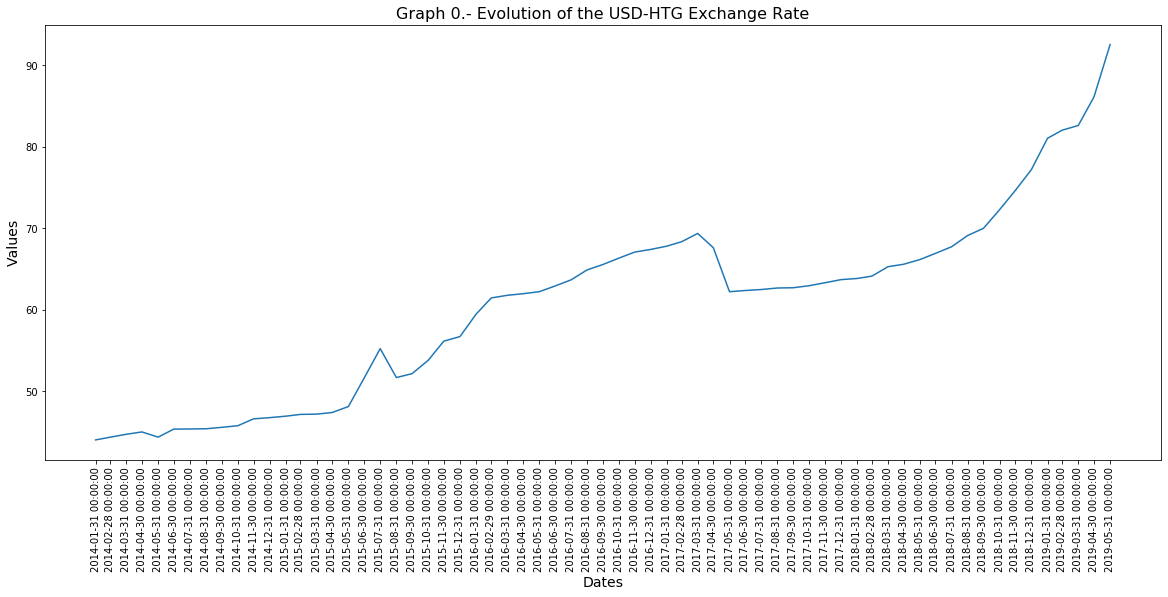

In [246]:
viz(dg[['end_rate']], (20,8), 1, 1, xlab='Dates', ylab='Values', 
    title=['Graph 0.- Evolution of the USD-HTG Exchange Rate'], 
    name='graphs/Evolution of the USD-HTG Exchange Rate')

As can be seen, the rates have gone beyond 50 gourdes after May 2015, but were still under control under Governor Castel's administration. Between May 2015 and March 2017, they kept increasing until they almost reached 70 HTG, and this was in the period of elections and unrests against Martelly's government. However the Central Bank seem to have regained control over the evolution of the rates, thanks to [economic policies](https://www.brh.ht/wp-content/uploads/2018/08/note_polmon4t15f.pdf) implemented under the governance of Charles Castel, which actually made the exchange rate drop substantially from around 70 HTG to staying around 60 HTG between April 2017 thru March 2018. Finally, under Jovenel Moïse's presidency and Jean Baden Dubois's governance, the dollar prices started spiking again from 70 HTG after March 2018 and have barely dropped since then.

### B. Bivariate Analysis <a name="bi-anal"></a>

In [247]:
dg.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


#### 1. Exchange Rates & Inflation Rates

Inflation varies the same as the exchange rate, those series are very likely to be positively correlated. This is to say that the inflation tends to be high when the Exchange rate is high and vice versa. 

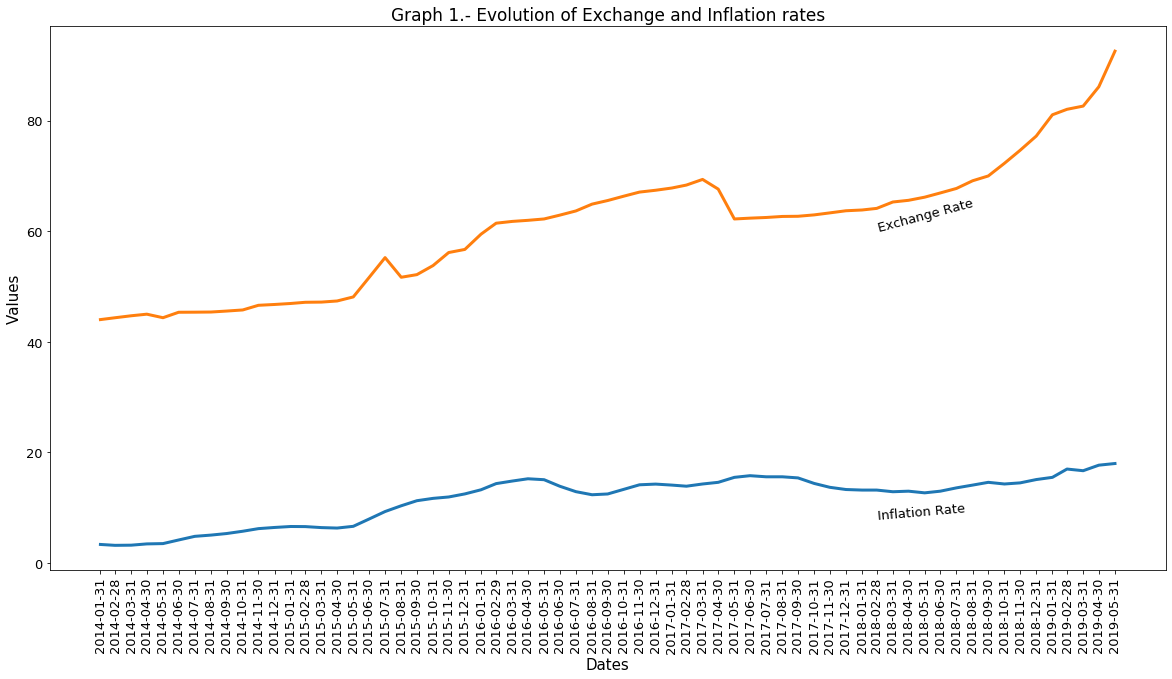

In [248]:
viz_stack()

#### _1.1.- Exchange Rates & Inflation Rates (at logarithmic scale)_

Although Graph 1.1 has reversed the position of the curves from Graph 1, the conclusion is still the same: the series are positively correlated, which means an increase in one is normally accompanied with an increase of different amplitude in the other.

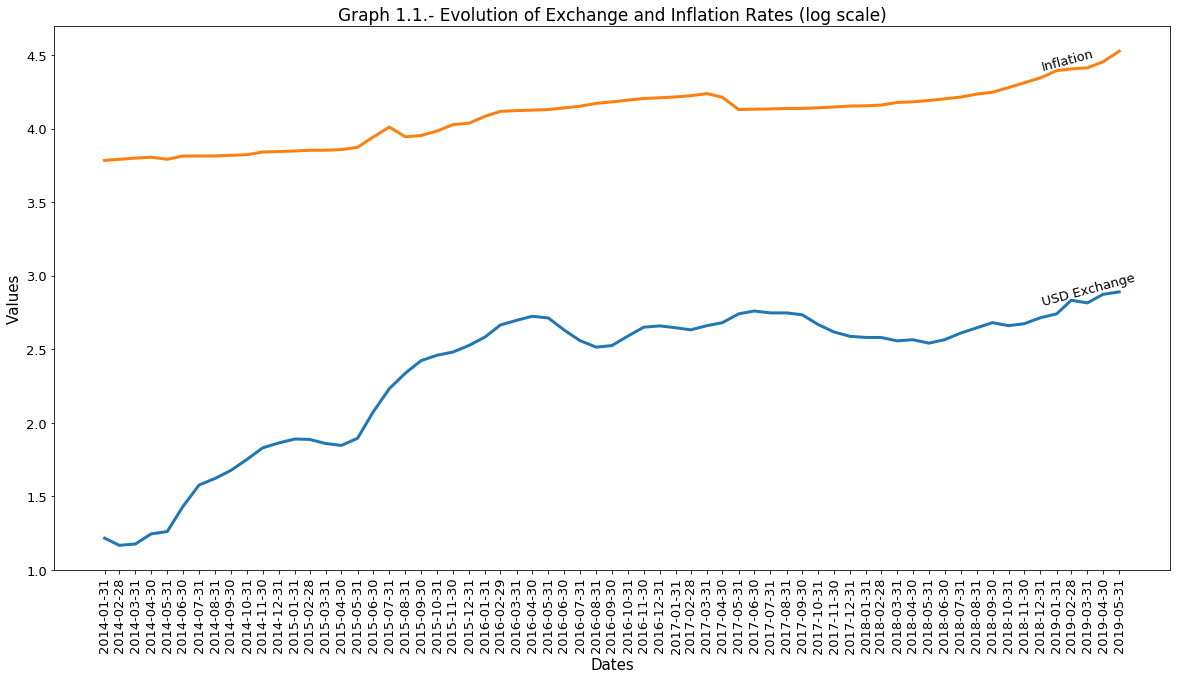

In [249]:
viz_stack(data=logdf, col1='inf', col2='end_rate', col3=None,
            x1='2018-12-31', x2='2018-12-31', x3='2018-02-28',
            y1=4.4, y2=2.8, y3=0,
            s1='Inflation', s2='USD Exchange', s3='',
            rot1=15, rot2=15, rot3=0,
            title='Graph 1.1.- Evolution of Exchange and Inflation Rates (log scale)', 
            name='graphs/log_end_rate-log_inf')

#### 2. Exchange Rates & International Trade

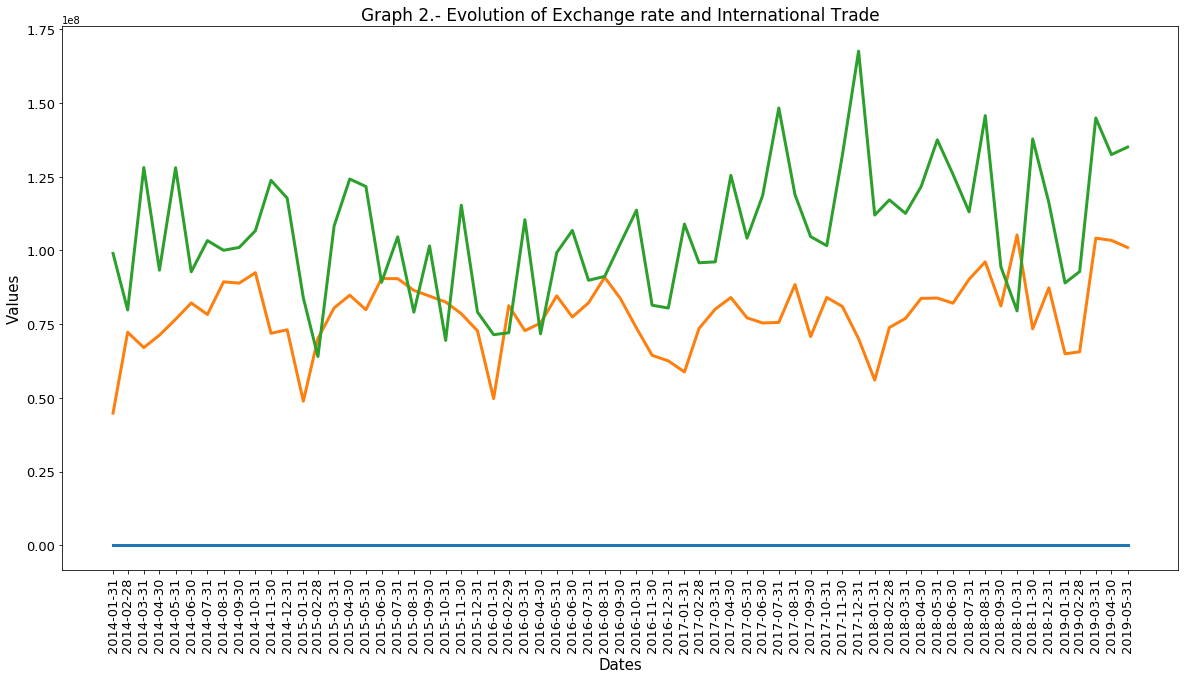

In [250]:
viz_stack(col1='us_imp_ht', col2='end_rate', col3='us_exp_ht',
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='', s2='', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 2.- Evolution of Exchange rate and International Trade', 
            name='graphs/end_rate-imp-exp')

#### _2.1.- Exchange Rates & International Trade (at logarithmic scale)_

The Graph above doesn't give a proper grasp of how exchange rates vary relative to imports and exports, because `end_rate` is of the order of tens, whereas `us_imp_ht` and `us_exp_ht` are of the order of millions. Logaritmic-scaled data will be used instead: 

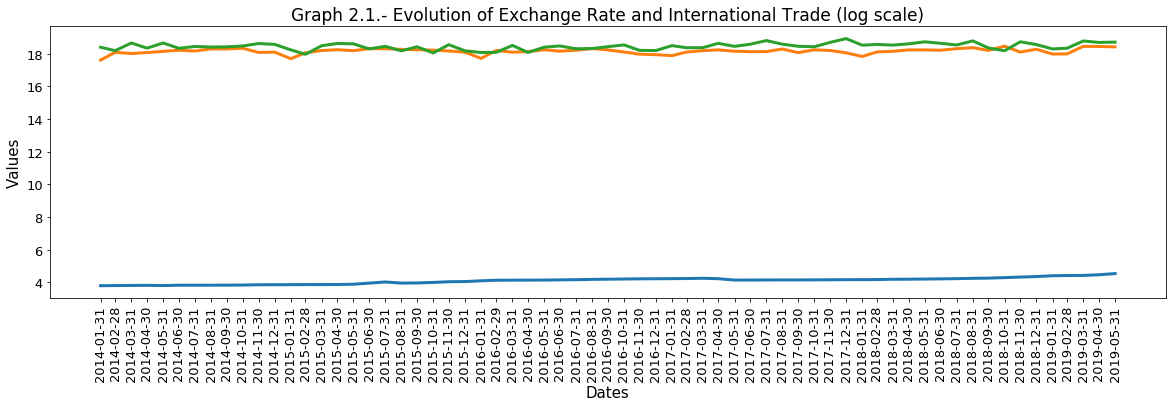

In [251]:
viz_stack(data=logdf, size=(20,5), col1='us_imp_ht', col2='end_rate', col3='us_exp_ht',
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='', s2='', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 2.1.- Evolution of Exchange Rate and International Trade (log scale)', 
            name='graphs/log_end_rate-log_imp-log-exp')

Graph 2.1 is nothing more informative than Graph 2... Let's explore these variables on unstacked line graphs instead!

#### 3. Exchange Rates and International Trade (at level scale, unstacked)

Descriptives already showed that Haitians import more from their main and first partner and export less. But now Graphs 3.2, 3.3 and 3.4 are about to tell us four main things:


1. There is a preference in Haiti for importing goods that come from abroad.


2. There is a preference in Haiti for the US Dollar, compared to the Gourdes. 


3. Since the Demand for US Dollars doesn't seem to have an impact on the Amount of Goods Imported, one has reasons to wonder whether the US Dollar is not hoarded by major economic agents.


4. And also, since the Demand for US Dollars doesn't seem to have any impact on the Exchange Rate, one has reasons to believe that some major economic agents might be controlling variables or putting in place certain artificial strategies which might be causing the Exchange Rate to vary independently of the Market Forces.


The above will be clarified with examples in the analyses below.

#### _3.1.- Exchange Rates and US Exports to Haiti (Analysis of Haitian Imports from the US, at level scale)_

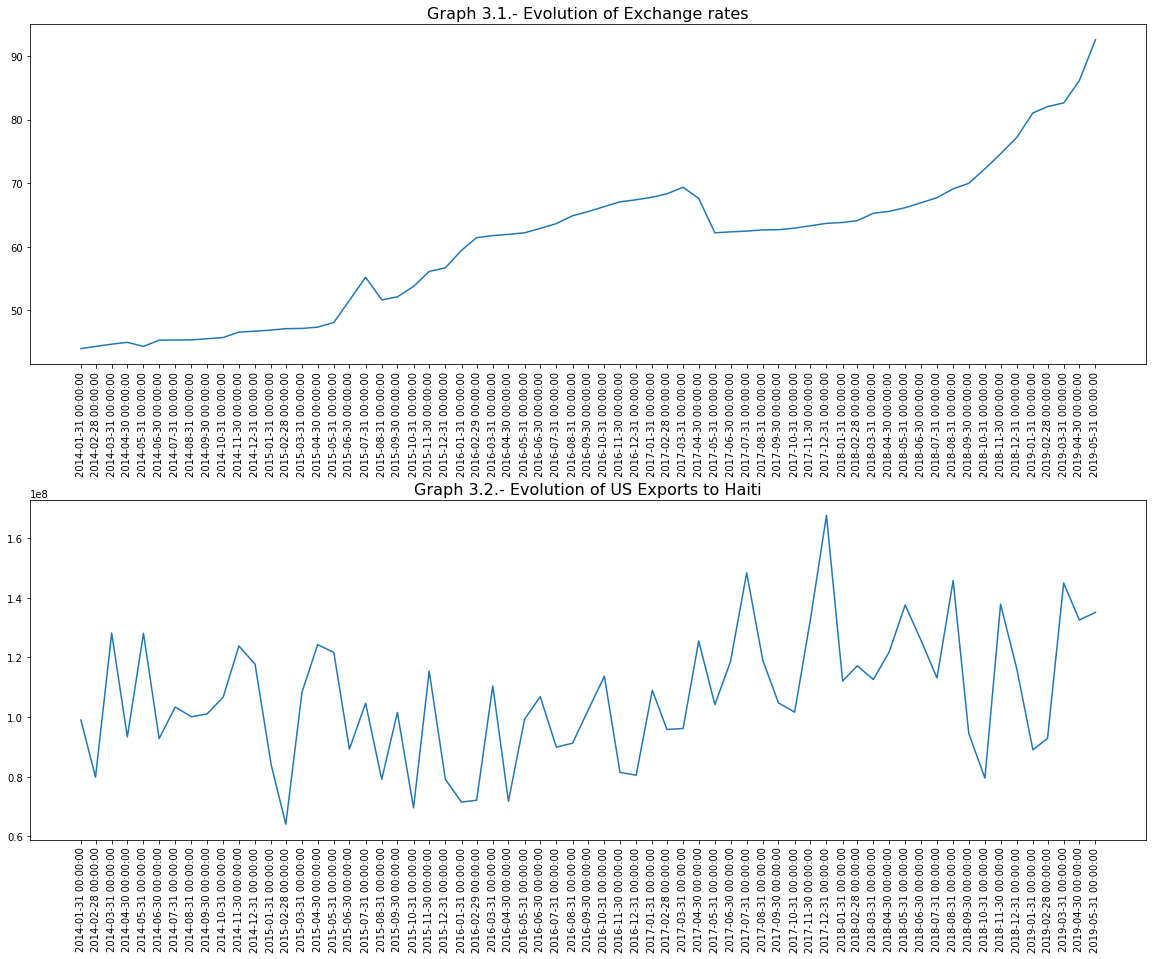

In [252]:
viz(dg[['end_rate', 'us_exp_ht']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Exchange rates', 
             'Graph 3.2.- Evolution of US Exports to Haiti'],
    name='graphs/end_rate-imp')

The USA exporting their products to Haiti, means Haitians are importing from the US. To do so, they need US dollars to buy US goods, which naturally impacts the demand for dollars. The more dollars importers need, the more scarce the dollar becomes, which makes its price in gourdes spike. However, this is not how it looks on the curve... 

+ For example, on the last day of February the Haitian imports from the US (same as the US Exports to Haiti) hit a historical low (about 60M USD). This means Haitian importers are not importing, so there should not be any Demand for the Dollar before this date. Nonetheless, the Exchange rate did not decrease: Graph 3.3 even indicate it had been slightly increasing, remaining less than 50 HTG, over the three last month before this drop. Should this effect of increase be imputed to agents hoarding large amounts of dollars? 


+ Another example is when the Imports from the US reached a historical high in December 2017 (160M USD). This means Haitian importers are importing, so there had to be a huge Demand for Dollars in the late months, which should've made the Exchange Rate spike dramatically. Nevertheless, what we observe is just a slight increase from May 2017 to December 2020, remaining less than 65 HTG. How come that huge Demand for US Dollars hasn't affected at all the Exchange Rate? 


+ And finally, from January 2018 thru May 2019, the Imports from the US can be approximated by a negative trend, meaning a low demand for US Dollars over the period. But still, the Exchange Rate has kept augmenting exponentially. Now why is the Dollar scarce and expensive in Haiti when the Demand for Dollars is not believe to have increased? 

It is possible that something other than the Haitian imports or a group of agents other than the Haitian importers are actually causing the exchange rate to spike at will. That something or someone is technically called a variable. Unfortunately, this study cannot determine such a variable, neither explore its characteristics.

#### _3.2.- Exchange Rates and US Imports from Haiti (Analysis of Haitian Exports to the US, at level scale)_

The first thing to note is the seasonality in the US Imports. A seasonality is a regularity that happens at the very same period of each period group. For example, the USA imports drops dramatically in January of every year, sometimes down to 20M USD.

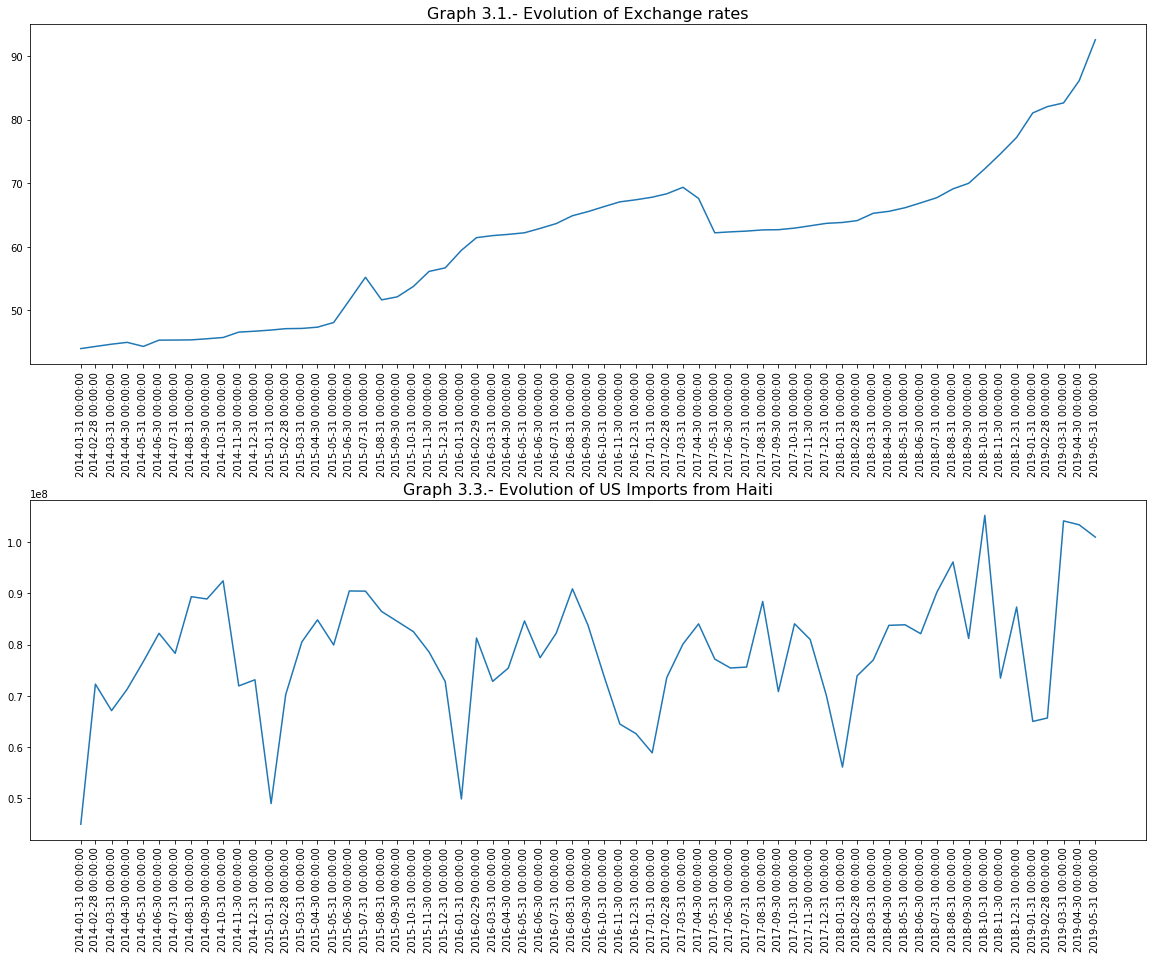

In [253]:
viz(dg[['end_rate', 'us_imp_ht']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Exchange rates', 
             'Graph 3.3.- Evolution of US Imports from Haiti'],
    name='graphs/end_rate-exp')

Moreover, the USA importing from Haiti, means Haitians are exporting their products to the USA. In doing so, US dollars is finding their way inside our economy, which naturally impacts the demand for dollars (negatively). The more dollars exporters get from selling their goods to the Americans, the less scarce the dollar becomes, which should make its price in gourdes go down. Let's take the same examples as with the exports and see if this gain could explain the anomalies we saw earlier...

+ On the last day of February 2015, the Haitian exports got up to (70M USD) from a low in January (50M USD, Graph 3.4). So in March 2015, more dollars have entered the economy. The following month should see the imports increase, since Haitians have more dollars in their pockets. Graph 3.3 effectively shows a sustained increase in the value of imported goods during the three months following February 2015. 


+ On the last day of December 2017, there was a drop in the Haitian exports compared to November 2016 (Graph 3.4). So, the Haitian exporters had fewer dollars in their pocket on the first day of January 2018 than they had at the end of December 2018. This means the Imports over the first months of 2018 should be dropping. Effectively, Graph 3.3 shows a dramatic drop in Imports in January 2018 (from 160M to 110M USD).


Graph 3.1, 3.2 and 3.3 show that the US Imports from Haiti seem to be fairly consistant with the market forces. However, because the US Imports seem to be positively correlated with the Exchange Rate, Graph 3.2 and 3.3 also give more reasons to believe that the market forces are being overriden by some major agents in the economy.

#### 4. Exchange Rates & Received Remittances

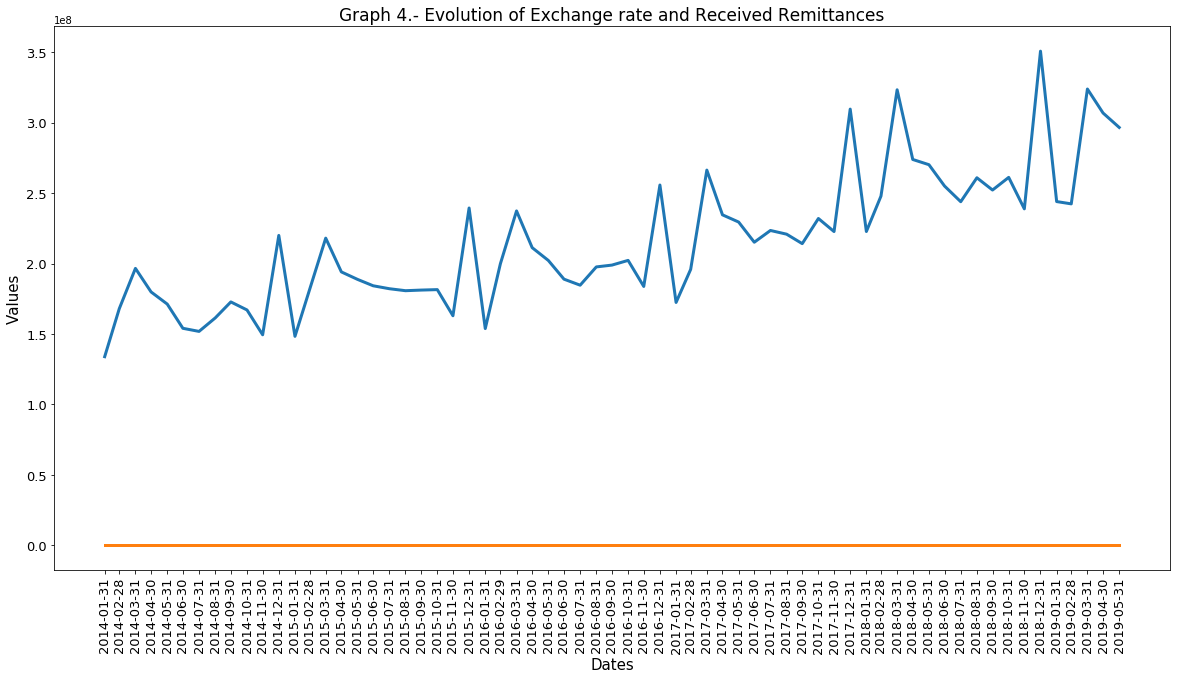

In [254]:
viz_stack(col1='rec_rem', col2='end_rate', col3=None,
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='', s2='', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 4.- Evolution of Exchange rate and Received Remittances', 
            name='graphs/end_rate-rec_rem')

#### _4.1.- Exchange Rates & Received Remittances (log-scale)_

In [255]:
logdf.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2014-01-31,3.784533,1.215146,18.712634,17.618687,18.410549,10.711993,10.941606
2014-02-28,3.792065,1.166307,18.939339,18.095680,18.195298,10.632147,10.636961
2014-03-31,3.800112,1.175526,19.096590,18.021210,18.668569,10.862857,10.954187
2014-04-30,3.806516,1.244120,19.007720,18.082073,18.351395,10.768190,10.846965
2014-05-31,3.792228,1.260074,18.958626,18.155137,18.668089,10.666883,10.853600


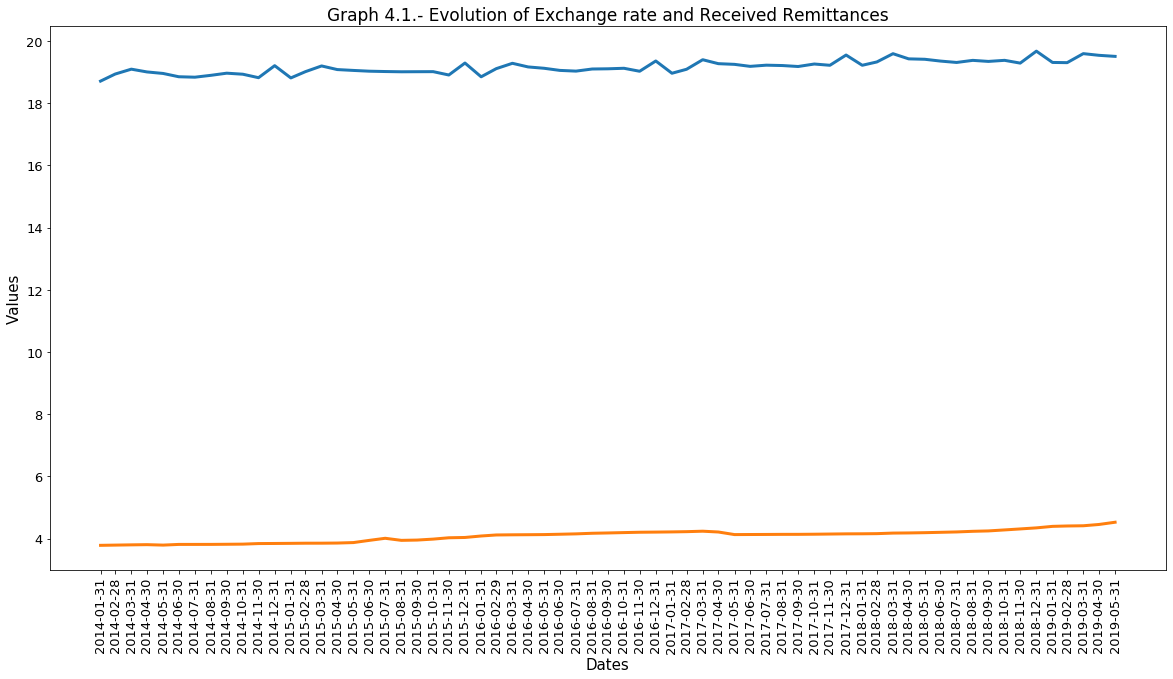

In [256]:
viz_stack(data=logdf, col1='rec_rem', col2='end_rate', col3=None,
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='', s2='', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 4.1.- Evolution of Exchange rate and Received Remittances', 
            name='graphs/log_end_rate-log_rec_rem')

#### _4.2.- Exchange Rates & Received Remittances (level, unstacked)_

Graph 3.1 and 4.2 show that Exchange Rates and Received Remittances have the same trend over time, meaning they might be causing one another.

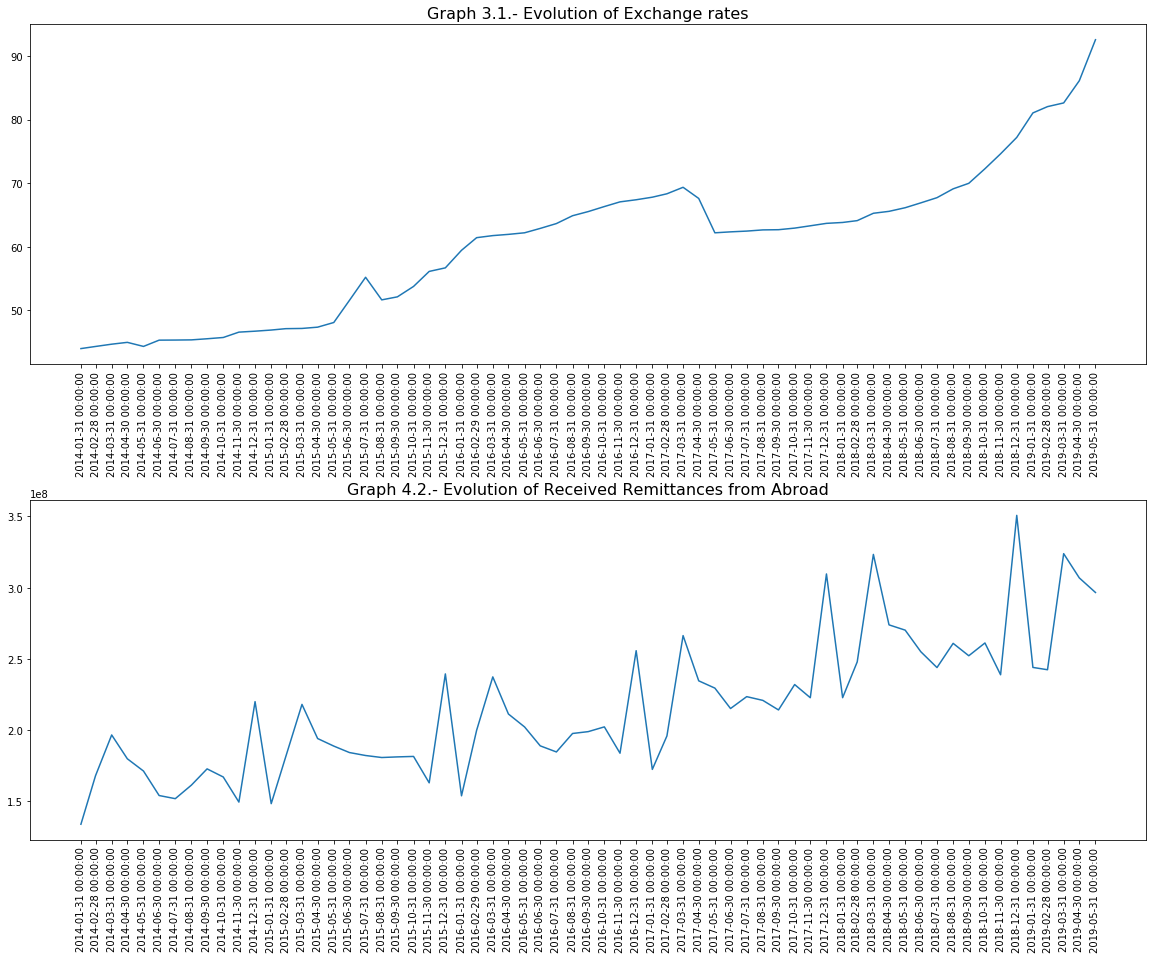

In [257]:
viz(dg[['end_rate', 'rec_rem']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Exchange rates', 
             'Graph 4.2.- Evolution of Received Remittances from Abroad'],
    name='graphs/end_rate-rec_unstacked')

Graph 4.2 shows money transfers sent from abroad are seasonal. For one reason or another, Haitians receive more remittances from abroad in March (260M USD in average) and and in December (275M USD, in average). And they receive way less in January (179M in average) and in November (192M USD). In comparison, the mean transfers received over the 65-month period under study is about 216 million USD.

In [258]:
[df[['rec_rem', 'date']][df.date.dt.month==3].min(), 
 df[['rec_rem', 'date']][df.date.dt.month==3].max(), 
 df[['rec_rem', 'date']][df.date.dt.month==3].mean()]

[rec_rem            1.96582e+08
 date       2014-03-31 00:00:00
 dtype: object,
 rec_rem            3.23885e+08
 date       2019-03-31 00:00:00
 dtype: object,
 rec_rem    2.609295e+08
 dtype: float64]

In [259]:
[df[['rec_rem', 'date']][df.date.dt.month==12].min(), 
 df[['rec_rem', 'date']][df.date.dt.month==12].max(), 
 df[['rec_rem', 'date']][df.date.dt.month==12].mean()]

[rec_rem            2.19982e+08
 date       2014-12-31 00:00:00
 dtype: object,
 rec_rem            3.50773e+08
 date       2018-12-31 00:00:00
 dtype: object,
 rec_rem    2.751212e+08
 dtype: float64]

In [260]:
[df[['rec_rem', 'date']][df.date.dt.month==1].min(), 
 df[['rec_rem', 'date']][df.date.dt.month==1].max(), 
 df[['rec_rem', 'date']][df.date.dt.month==1].mean()]

[rec_rem            1.33904e+08
 date       2014-01-31 00:00:00
 dtype: object,
 rec_rem            2.44004e+08
 date       2019-01-31 00:00:00
 dtype: object,
 rec_rem    1.792130e+08
 dtype: float64]

In [261]:
[df[['rec_rem', 'date']][df.date.dt.month==11].min(), 
 df[['rec_rem', 'date']][df.date.dt.month==11].max(), 
 df[['rec_rem', 'date']][df.date.dt.month==11].mean()]

[rec_rem            1.49456e+08
 date       2014-11-30 00:00:00
 dtype: object,
 rec_rem            2.38848e+08
 date       2018-11-30 00:00:00
 dtype: object,
 rec_rem    1.915535e+08
 dtype: float64]

In [262]:
df['rec_rem'].mean()

215954828.83971843

#### 5. Exchange Rates & Regular International Air Traffic

In [263]:
dg.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


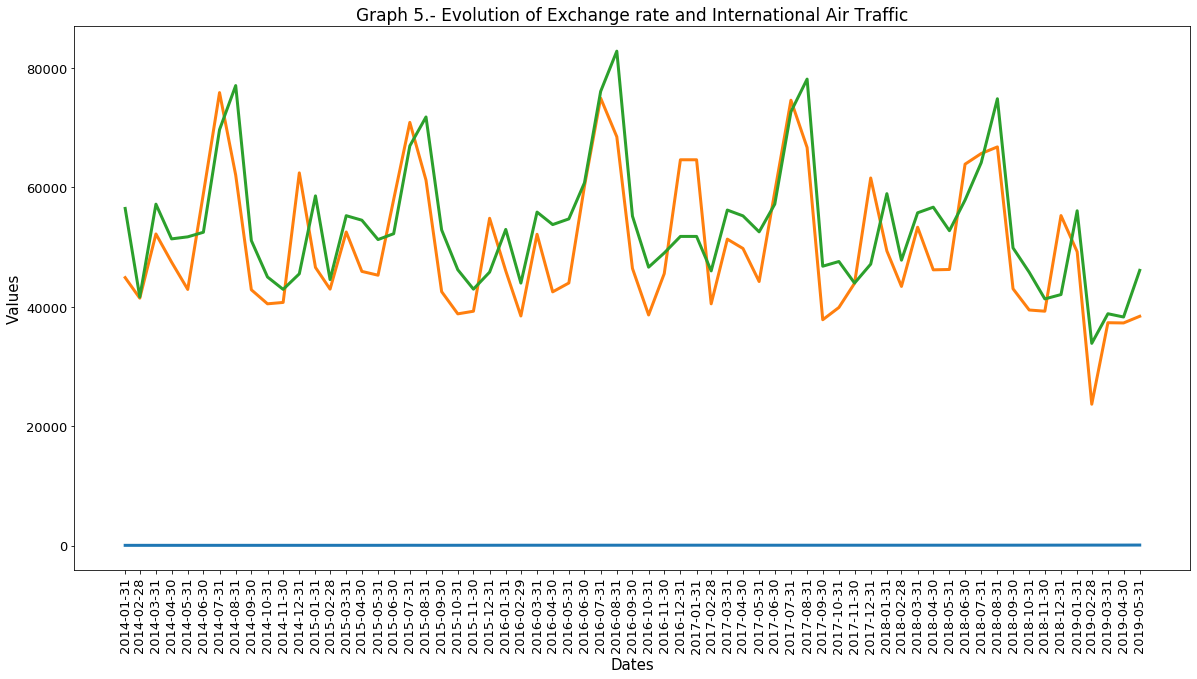

In [264]:
viz_stack(col1='int_reg_deb', col2='end_rate', col3='int_reg_emb',
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='', s2='', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 5.- Evolution of Exchange rate and International Air Traffic', 
            name='graphs/end_rate-int_reg_deb-emb')

#### _5.1.- Exchange Rates & Regular International Air Traffic (log-scale)_

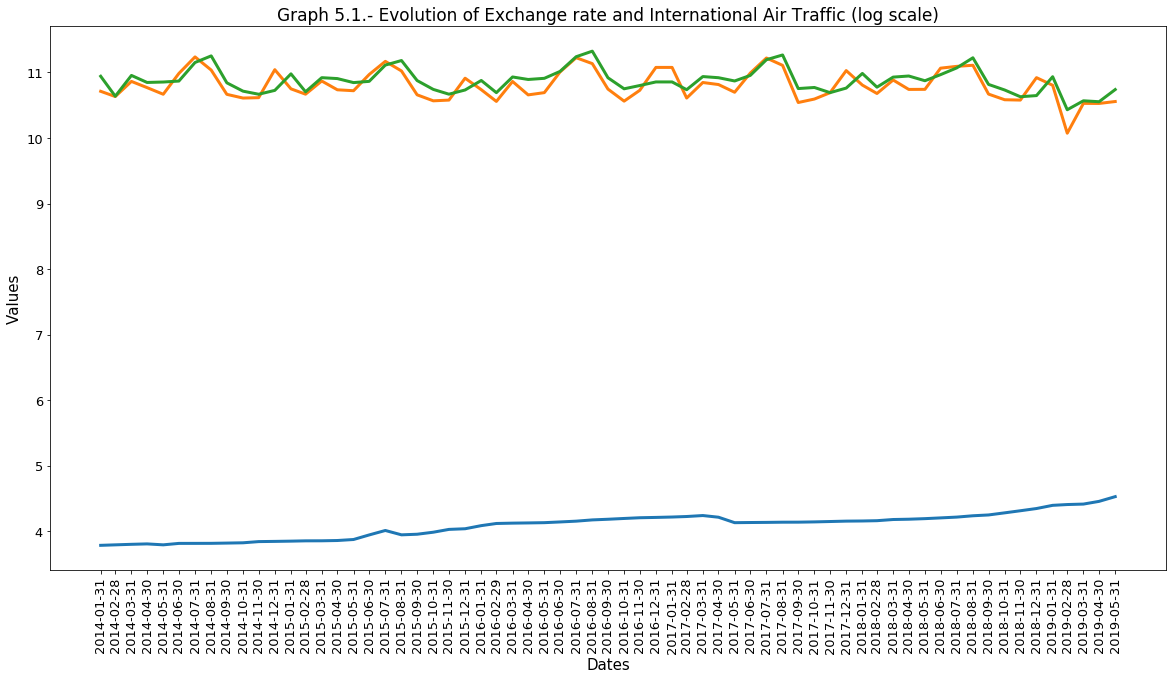

In [265]:
viz_stack(data=logdf, col1='int_reg_deb', col2='end_rate', col3='int_reg_emb',
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='', s2='', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 5.1.- Evolution of Exchange rate and International Air Traffic (log scale)', 
            name='graphs/log_end_rate-log_int_reg_deb-emb')

#### _5.2.- Exchange Rates & Incoming Flight Passengers (at level scale, unstacked)_

When the Exchange Rates go up, there are there are fewer passengers coming into the country. This is bad news for industries like Tourism, Airlines companies, families expecting their relatives to come in and see them... This is bad news for the economy as a whole. But again, it is great for any particular agent or business who has chosen to venture on the US Money Market of Services in Haiti. 

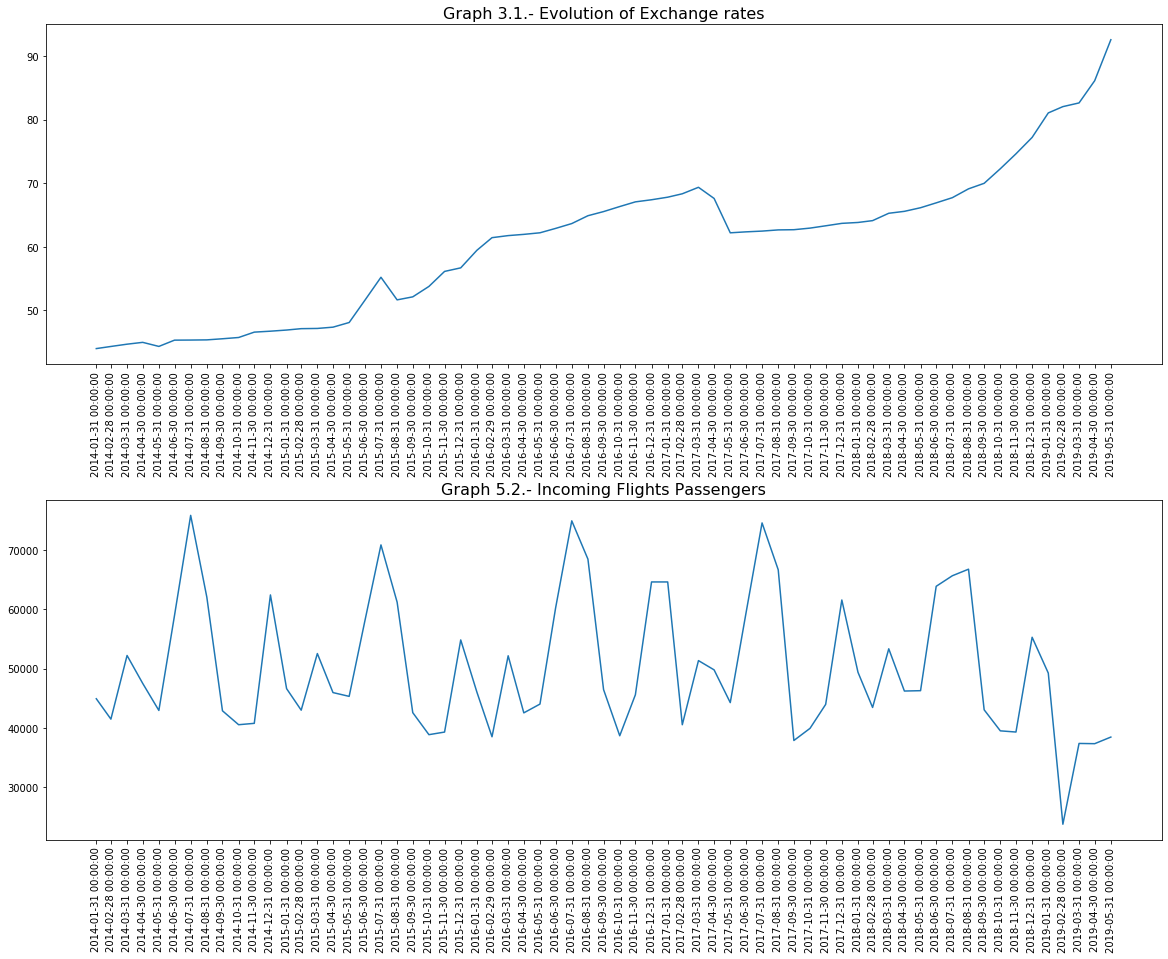

In [266]:
viz(dg[['end_rate', 'int_reg_deb']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Exchange rates', 
             'Graph 5.2.- Incoming Flights Passengers'],
    name='graphs/end_rate-int_reg_deb')

The incoming flights, as one can expect, is also seasonal. They spike in July every year, with 72k passengers landing in the country in average. In comparison, the average over the whole period under study is about 50k.

In [267]:
[df[['int_reg_deb', 'date']][df.date.dt.month==7].min(), 
 df[['int_reg_deb', 'date']][df.date.dt.month==7].max(), 
 df[['int_reg_deb', 'date']][df.date.dt.month==7].mean()]

[int_reg_deb                  65677
 date           2014-07-31 00:00:00
 dtype: object,
 int_reg_deb                  75881
 date           2018-07-31 00:00:00
 dtype: object,
 int_reg_deb    72401.6
 dtype: float64]

In [268]:
[df[['int_reg_deb', 'date']].min(), 
 df[['int_reg_deb', 'date']].max(), 
 df[['int_reg_deb', 'date']].mean()]

[int_reg_deb                  23682
 date           2014-01-31 00:00:00
 dtype: object,
 int_reg_deb                  75881
 date           2019-05-31 00:00:00
 dtype: object,
 int_reg_deb    50236.784615
 dtype: float64]

#### _5.3.- Exchange Rates & Outgoing Flights Passengers (at level scale, unstacked)_

When the Exchange Rates go up, there are there are fewer passengers going out of the the country, too. But this trend is less steep than that of the Incoming Passengers. So passengers leaving the country would still leave at about the same rate, no matter how the exchange rate vary. While the incoming passengers might tend to be fewer and fewer as the Exchange Rate is spiking.

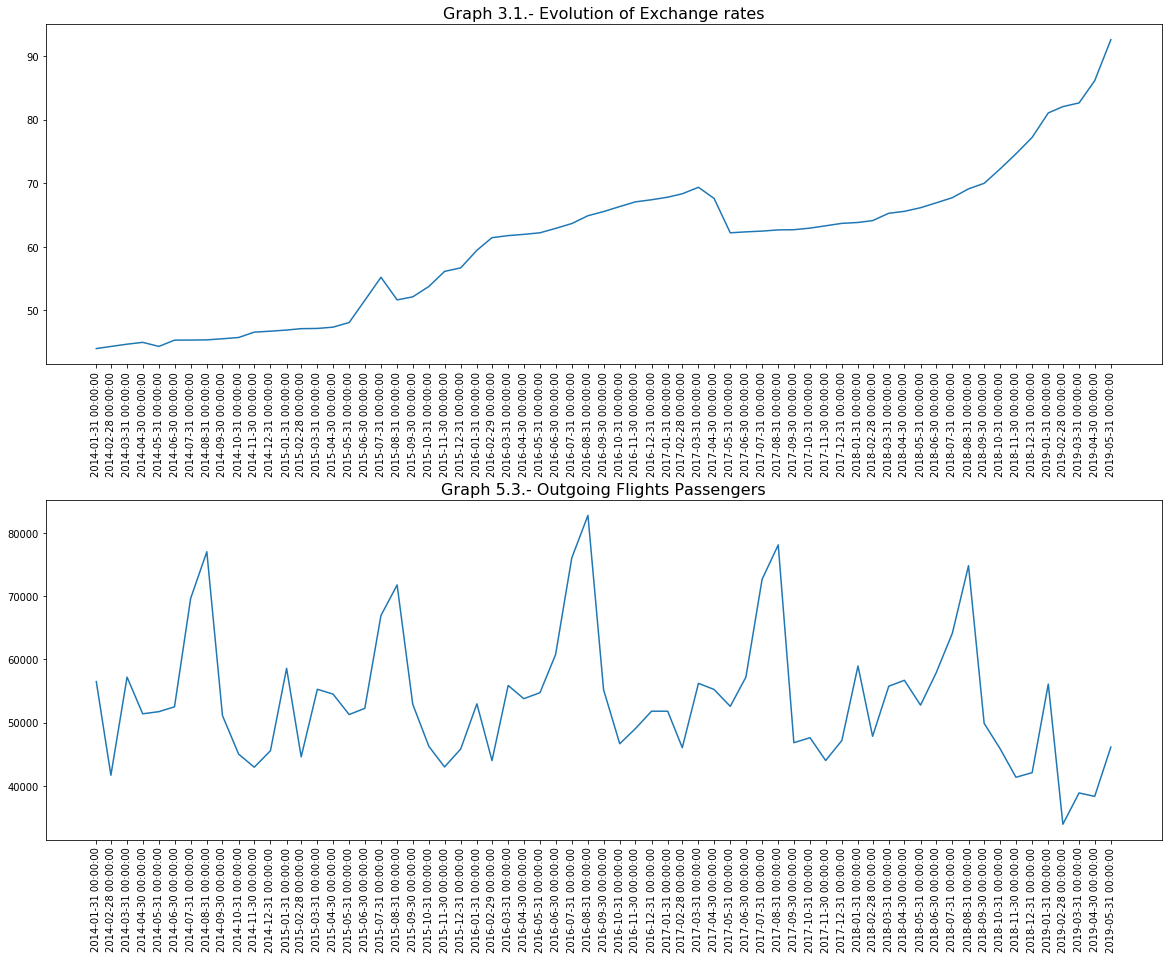

In [269]:
viz(dg[['end_rate', 'int_reg_emb']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Exchange rates', 
             'Graph 5.3.- Outgoing Flights Passengers'],
    name='graphs/end_rate-int_reg_emb')

The outgoing flights are also seasonal. They spike in August every year, with about 76k passengers leaving the country in average (6% more than those who came in in July). In comparison, the average over the whole period under study is about 54k, that is 8% more than those who come into the country.

In [270]:
[df[['int_reg_emb', 'date']][df.date.dt.month==8].min(), 
 df[['int_reg_emb', 'date']][df.date.dt.month==8].max(), 
 df[['int_reg_emb', 'date']][df.date.dt.month==8].mean()]

[int_reg_emb                  71797
 date           2014-08-31 00:00:00
 dtype: object,
 int_reg_emb                  82822
 date           2018-08-31 00:00:00
 dtype: object,
 int_reg_emb    76933.4
 dtype: float64]

In [271]:
[df[['int_reg_emb', 'date']].min(), 
 df[['int_reg_emb', 'date']].max(), 
 df[['int_reg_emb', 'date']].mean()]

[int_reg_emb                  33880
 date           2014-01-31 00:00:00
 dtype: object,
 int_reg_emb                  82822
 date           2019-05-31 00:00:00
 dtype: object,
 int_reg_emb    53618.046154
 dtype: float64]

### III. MULTIVARIATE ANALYSIS <a name="multi-var"></a>

### _III.1.- MULTIVARIATE TIME SERIES ANALYSIS_ <a name="multi-anal"></a>

In the case of time series, the study of linear correlations as described by Pearson is obsolete. Another framework has been provided by Engle, Granger, Johansen, Wold, and other famous econometrist: the hypotheses of causation and cointegration, which accounts for correlation that may occur over time, and lags that induce a non-linear relation between variables. 

### A. Stationarity <a name="stationarity"></a>

A time series is first a mathematical series. To be able to study its properties, it must be converging to some long run stability. This is described as stationarity. Stationarity tests detect whether the series has a unit root, this is to say whether the coefficient of its first lag (as it is regressed on itself) is lesser than one, or not. If it is lesser than one, this means the series tends to converge over time. All other coefficients tend to be lesser than the first root. To evaluate stationarity, we will use **Dickey Fuller**'s sequential tests, starting with the series at level. 

_**Note:** For all that follows, we will use the `Xtrain` dataset because log transformation is recommended in economic series: the coefficients estimated are elasticities! We won't account for the trend. Its presence in the modelization or not is not important to us. `Xtest` for accuracy testing._

#### 1.- Dickey Fuller's Unit Root (level)

In [311]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False, regression='ct'):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='t-stat', regression='ct')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    
          
# ADF Test on each column
for name, column in Xtrain.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "end_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.533
 No. Lags Chosen       = 7
 Critical value 1%     = -4.137
 Critical value 5%     = -3.495
 Critical value 10%    = -3.176
 => P-Value = 0.3117. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7819
 No. Lags Chosen       = 5
 Critical value 1%     = -4.13
 Critical value 5%     = -3.492
 Critical value 10%    = -3.175
 => P-Value = 0.7134. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

All series are non-stationary at level when the linear-trend model of Dickey is considered. Let's modelize the no-trend model with a constant and see if any becomes stationary:

In [312]:
# ADF Test on each column
for name, column in Xtrain.iteritems():
    adfuller_test(column, name=column.name, regression='c')
    print('\n')

    Augmented Dickey-Fuller Test on "end_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.533
 No. Lags Chosen       = 7
 Critical value 1%     = -4.137
 Critical value 5%     = -3.495
 Critical value 10%    = -3.176
 => P-Value = 0.3117. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7819
 No. Lags Chosen       = 5
 Critical value 1%     = -4.13
 Critical value 5%     = -3.492
 Critical value 10%    = -3.175
 => P-Value = 0.7134. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

All series are non-stationary at level when the constant model of Dickey is considered. Let's modelize the no-trend-no-constant model and see if any becomes stationary:

In [313]:
# ADF Test on each column
for name, column in Xtrain.iteritems():
    adfuller_test(column, name=column.name, regression='nc')
    print('\n')

    Augmented Dickey-Fuller Test on "end_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.533
 No. Lags Chosen       = 7
 Critical value 1%     = -4.137
 Critical value 5%     = -3.495
 Critical value 10%    = -3.176
 => P-Value = 0.3117. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7819
 No. Lags Chosen       = 5
 Critical value 1%     = -4.13
 Critical value 5%     = -3.492
 Critical value 10%    = -3.175
 => P-Value = 0.7134. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

All series are non-stationary at level when the no-trend-no-constant model of Dickey is considered. Let's compute the first differences and start over the sequential strategy of tests:

#### 2.- Dickey Fuller's Unit Root (first differences)

In [343]:
diff1 = Xtrain.copy().diff().dropna()
diff1.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2014-02-28,0.007533,-0.048839,0.226705,0.476993,-0.215252,-0.079846,-0.304646
2014-03-31,0.008047,0.009218,0.157252,-0.074470,0.473271,0.230710,0.317226
2014-04-30,0.006404,0.068594,-0.088870,0.060863,-0.317174,-0.094667,-0.107221
2014-05-31,-0.014288,0.015954,-0.049094,0.073065,0.316694,-0.101307,0.006634
2014-06-30,0.021960,0.170041,-0.105790,0.069570,-0.322528,0.317680,0.014702


In [344]:
for name, column in diff1.iteritems():
    adfuller_test(column, name=column.name, regression='ct')
    print('\n')

    Augmented Dickey-Fuller Test on "end_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.0202
 No. Lags Chosen       = 0
 Critical value 1%     = -4.118
 Critical value 5%     = -3.486
 Critical value 10%    = -3.171
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3497
 No. Lags Chosen       = 7
 Critical value 1%     = -4.141
 Critical value 5%     = -3.497
 Critical value 10%    = -3.177
 => P-Value = 0.4067. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.

All variables but `inf`, `rec_rem`, `us_exp_ht`, `int_reg_emb` are stationary in first-differences with a constant and a trend. Let's try the no-trend-but-constant model and test if there is any unit root in these series:

In [345]:
diff11 = diff1[['inf', 'rec_rem', 'us_exp_ht', 'int_reg_emb']]
diff11.head()

,inf,rec_rem,us_exp_ht,int_reg_emb
date,,,,
2014-02-28,-0.048839,0.226705,-0.215252,-0.304646
2014-03-31,0.009218,0.157252,0.473271,0.317226
2014-04-30,0.068594,-0.088870,-0.317174,-0.107221
2014-05-31,0.015954,-0.049094,0.316694,0.006634
2014-06-30,0.170041,-0.105790,-0.322528,0.014702


In [346]:
for name, column in diff11.iteritems():
    adfuller_test(column, name=column.name, regression='c')
    print('\n')

    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3497
 No. Lags Chosen       = 7
 Critical value 1%     = -4.141
 Critical value 5%     = -3.497
 Critical value 10%    = -3.177
 => P-Value = 0.4067. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5229
 No. Lags Chosen       = 11
 Critical value 1%     = -4.157
 Critical value 5%     = -3.504
 Critical value 10%    = -3.182
 => P-Value = 0.3166. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "us_exp_ht" 
    -----------------------------------------------
 Null Hypothesis: Data has

The variables `inf`, `rec_rem`, `us_exp_ht`, `int_reg_emb` are not stationary in first-differences with a constant and a trend. Let's try the no-trend-no-constant model and test if there is any unit root in these series:

In [347]:
for name, column in diff11.iteritems():
    adfuller_test(column, name=column.name, regression='nc')
    print('\n')

    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3497
 No. Lags Chosen       = 7
 Critical value 1%     = -4.141
 Critical value 5%     = -3.497
 Critical value 10%    = -3.177
 => P-Value = 0.4067. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5229
 No. Lags Chosen       = 11
 Critical value 1%     = -4.157
 Critical value 5%     = -3.504
 Critical value 10%    = -3.182
 => P-Value = 0.3166. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "us_exp_ht" 
    -----------------------------------------------
 Null Hypothesis: Data has

The variables `inf`, `rec_rem`, `us_exp_ht` and `int_reg_emb` are not stationary in first-differences with any of Dickey's models tried. Let's test the second-difference series:

#### 3.- Dickey Fuller's Unit Root (second differences)

In [348]:
diff2 = diff11.copy().diff().dropna()
diff2.head()

,inf,rec_rem,us_exp_ht,int_reg_emb
date,,,,
2014-03-31,0.058057,-0.069453,0.688523,0.621872
2014-04-30,0.059376,-0.246122,-0.790445,-0.424448
2014-05-31,-0.052640,0.039777,0.633867,0.113856
2014-06-30,0.154086,-0.056696,-0.639221,0.008067
2014-07-31,-0.023826,0.091388,0.430621,0.268564


In [349]:
for name, column in diff2.iteritems():
    adfuller_test(column, name=column.name, regression='ct')
    print('\n')

    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5357
 No. Lags Chosen       = 8
 Critical value 1%     = -4.148
 Critical value 5%     = -3.5
 Critical value 10%    = -3.179
 => P-Value = 0.0357. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4795
 No. Lags Chosen       = 10
 Critical value 1%     = -4.157
 Critical value 5%     = -3.504
 Critical value 10%    = -3.182
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "us_exp_ht" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level  

All series are stationary with a trend and a constant. The logarithm of the variables `inf`, `rec_rem`, `us_exp_ht`, `int_reg_emb` are second-difference-stationary, whereas the logarithm of the others are first-difference-stationary. We will make a new table, that contains the series in first and second difference:

In [350]:
X_train = pd.concat([diff1[['end_rate', 'us_imp_ht', 'int_reg_deb']], diff2], 
                    axis=1, sort=False).dropna()

In [351]:
X_train.head()

,end_rate,us_imp_ht,int_reg_deb,inf,rec_rem,us_exp_ht,int_reg_emb
date,,,,,,,
2014-03-31,0.008047,-0.074470,0.230710,0.058057,-0.069453,0.688523,0.621872
2014-04-30,0.006404,0.060863,-0.094667,0.059376,-0.246122,-0.790445,-0.424448
2014-05-31,-0.014288,0.073065,-0.101307,-0.052640,0.039777,0.633867,0.113856
2014-06-30,0.021960,0.069570,0.317680,0.154086,-0.056696,-0.639221,0.008067
2014-07-31,0.000337,-0.048830,0.252358,-0.023826,0.091388,0.430621,0.268564


### B. Long Term Correlations <a name="granger-johansen"></a>

_**Note:** In all that follows, the `logdfg` transformed table will be used._

#### 1. Granger's Pairwise Causality

A time series is often correlated with another series' lags. Granger's pairwise causality tests detect up to which period this correlation stands, or if there is any current correlation at all between both series.

In [352]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=9
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test=test, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(X_train, variables = X_train.columns)     

,end_rate_x,us_imp_ht_x,int_reg_deb_x,inf_x,rec_rem_x,us_exp_ht_x,int_reg_emb_x
end_rate_y,1.0000,0.2436,0.1179,0.0110,0.1138,0.0431,0.0572
us_imp_ht_y,0.0000,1.0000,0.0000,0.0025,0.0000,0.0013,0.0000
int_reg_deb_y,0.1167,0.0000,1.0000,0.1531,0.0000,0.3525,0.0000
inf_y,0.7112,0.2613,0.3957,1.0000,0.4766,0.1279,0.1484
rec_rem_y,0.0653,0.0000,0.0000,0.2101,1.0000,0.0008,0.0000
us_exp_ht_y,0.0100,0.0000,0.0974,0.1284,0.1292,1.0000,0.0130
int_reg_emb_y,0.2147,0.0000,0.0000,0.1026,0.0000,0.0017,1.0000


**Results:**

+ `d(end_rate_y)` = `d(us_exp_ht_x)` + `d^2(inf_x)`


+ `d(us_imp_ht_y)` = `d(end_rate_x)` + `d(int_reg_deb_x)` +  `d^2(inf_x)` + `d^2(rec_rem_x)` + `d^2(us_exp_ht_x)` + `d^2(int_reg_emb_x)`


+ `d(int_reg_deb_y)` = `d(us_imp_ht_x)` + `d^2(rec_rem_x)` + `d^2(int_reg_emb_x)`


+ `d^2(rec_rem_y)` = `d(us_imp_ht_x)` + `d^2(us_exp_ht_x)` + `d(int_reg_deb_x)` + `d^2(int_reg_emb_x)`


+ `d^2(us_exp_ht_y)` = `d(end_rate_x)` + `d(us_imp_ht_x)` + `d^2(int_reg_emb_x)`


+ `d^2(int_reg_emb_y)` = `d(us_imp_ht_x)` + `d^2(us_exp_ht_x)` + `d(int_reg_deb_x)` + `d^2(rec_rem_x)`


Almost all the variables are causing each other, this makes the system a good candidate for a matrix estimation.

#### 2. Johansen's Cointegration Test

while causality indicates either X is causing Y or either Y is causing X or either of both variables are casuing each other, cointegration tells us whether there exists a long and/or a short term relation among a subset of a set of variables.

In [353]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05, max_lag=3): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,max_lag)
    d = {'0.90':0, '0.95':1, '0.99':3}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('     Name       ::  Test Stat > C(95%)    =>   Signif  \n', '--'*30)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(col.rjust(15), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(X_train)

     Name       ::  Test Stat > C(95%)    =>   Signif  
 ------------------------------------------------------------
       end_rate ::  375.15    > 111.7797  =>   True
      us_imp_ht ::  265.13    > 83.9383   =>   True
    int_reg_deb ::  170.88    > 60.0627   =>   True
            inf ::  94.66     > 40.1749   =>   True
        rec_rem ::  58.05     > 24.2761   =>   True
      us_exp_ht ::  27.04     > 12.3212   =>   True
    int_reg_emb ::  2.96      > 4.1296    =>   False


With 7-1 relation relations of cointegration, we want to estimate a model using all the variables as are:

### C. Modelling & Forecasting  <a name="model-predict"></a>

We need to make one last conversion to make the VAR estimation accurate and understandable to the `statsmodels` package:

In [354]:
X_train.index = pd.DatetimeIndex(X_train.index).to_period('M')

#### 1. Fitting the VAR estimation

In [355]:
from statsmodels.tsa.api import VAR

model = VAR(X_train)

In [356]:
for i in range(1,5):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -29.558897623120398
BIC :  -27.586997676362426
FPE :  1.4717797867504414e-13
HQIC:  -28.7891477465972 

Lag Order = 2
AIC :  -30.738283452185975
BIC :  -27.00817110550711
FPE :  4.8648382759994706e-14
HQIC:  -29.285329356541077 

Lag Order = 3
AIC :  -32.29968459520866
BIC :  -26.779861871585485
FPE :  1.2607370012891061e-14
HQIC:  -30.154493389318272 

Lag Order = 4
AIC :  -34.3936225407389
BIC :  -27.051722661823984
FPE :  2.5164636125272177e-15
HQIC:  -31.547183484395468 



In [357]:
model.select_order(maxlags=4).summary()

,AIC,BIC,FPE,HQIC
0,-28.13,-27.88*,6.048e-13,-28.04
1,-29.56,-27.53,1.478e-13,-28.77
2,-30.93,-27.13,4.072e-14,-29.45
3,-32.46,-26.89,1.097e-14,-30.30
4,-34.39*,-27.05,2.516e-15*,-31.55*


In [358]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, Aug, 2020
Time:                     15:00:53
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -27.0517
Nobs:                     56.0000    HQIC:                  -31.5472
Log likelihood:           609.798    FPE:                2.51646e-15
AIC:                     -34.3936    Det(Omega_mle):     1.35573e-16
--------------------------------------------------------------------
Results for equation end_rate
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.004609         0.003924            1.174           0.240
L1.end_rate            0.242520         0.189026            1.283           0.199
L1.us_imp_ht          -0.001410         0.033291     

In [359]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(X_train.columns, out):
    lb = 1.372
    hb = 1.808
    if (val>=0 and val<lb):
        print(col, ':', round(val, 2), ' >>> Positive error autocorrelation')
    elif ((val>=lb and val<hb) or (val>=4-hb and val<4-lb)):
        print(col, ':', round(val, 2), ' >>> Unable to determine autocorrelation type')
    elif (val>=4-lb and val<=4):
        print(col, ':', round(val, 2), ' >>> Negative error autocorrelation')
    else:
        print(col, ':', round(val, 2), ' >>> No autocorrelation')

end_rate : 1.95  >>> No autocorrelation
us_imp_ht : 2.52  >>> Unable to determine autocorrelation type
int_reg_deb : 1.65  >>> Unable to determine autocorrelation type
inf : 1.77  >>> Unable to determine autocorrelation type
rec_rem : 2.12  >>> No autocorrelation
us_exp_ht : 2.18  >>> No autocorrelation
int_reg_emb : 2.1  >>> No autocorrelation


#### 2. Forecasts & Evaluation

In [360]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = X_train.values[-lag_order:]
forecast_input

4


array([[ 0.03192295, -0.36018689, -0.0051316 ,  0.0346511 , -0.12431616,
         0.7223517 , -0.01739758],
       [ 0.03395199,  0.17342948,  0.34216476,  0.02665698,  0.4736782 ,
        -0.72082496,  0.12018536],
       [ 0.04863956, -0.29601553, -0.11604573, -0.01440081, -0.74726349,
        -0.09596622,  0.27047291],
       [ 0.012138  ,  0.01017644, -0.73168636,  0.06622804,  0.3562997 ,
         0.30905058, -0.79202876]])

In [363]:
# Forecast
nobs = len(Xtest)
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=logdf.index[-nobs:], columns=logdf.columns)
df_forecast = df_forecast[X_train.columns]
df_forecast

,end_rate,us_imp_ht,int_reg_deb,inf,rec_rem,us_exp_ht,int_reg_emb
date,,,,,,,
2019-03-31,0.044846,-0.141273,0.356613,0.630555,0.852117,0.679311,1.074311
2019-04-30,-0.041323,0.051395,-0.599688,-0.794262,-0.495135,-1.427908,-0.524573
2019-05-31,0.002712,0.019070,0.455984,0.820418,0.197724,1.273658,-0.160630


In [364]:
def invert_transform(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
        df_fc.rename(columns={col: col+'_forecast'}, inplace=True)
    return df_fc

In [365]:
first_diff = np.exp(invert_transform(Xtrain[['end_rate', 'us_imp_ht', 'int_reg_deb']], 
                                     df_forecast[['end_rate', 'us_imp_ht', 'int_reg_deb']]))
                    
sec_diff = np.exp(invert_transform(Xtrain[['inf', 'rec_rem', 'us_exp_ht', 'int_reg_emb']], 
                                   df_forecast[['inf', 'rec_rem', 'us_exp_ht', 'int_reg_emb']], 
                                   second_diff=True))
                    
df_results = pd.concat([first_diff, sec_diff], axis=1, sort=False)
df_results

,end_rate_forecast,us_imp_ht_forecast,int_reg_deb_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,int_reg_emb_forecast
date,,,,,,,
2019-03-31,85.787122,5.697905e+07,33829.337783,35.027784,5.645332e+08,1.910354e+08,59924.896376
2019-04-30,82.314360,5.998407e+07,18571.719574,32.616160,8.013746e+08,9.427453e+07,62726.610681
2019-05-31,82.537932,6.113892e+07,29301.062367,68.985185,1.386283e+09,1.662715e+08,55915.924154


In [367]:
df_test = np.exp(Xtest.head())
df_test = df_test[X_train.columns]
df_test

,end_rate,us_imp_ht,int_reg_deb,inf,rec_rem,us_exp_ht,int_reg_emb
date,,,,,,,
2019-03-31,82.6061,104189527.0,37335.0,16.7,3.238851e+08,144930934.0,38839.0
2019-04-30,86.0961,103425157.0,37295.0,17.7,3.068589e+08,132519689.0,38291.0
2019-05-31,92.5356,101016899.0,38412.0,18.0,2.966206e+08,135071227.0,46107.0


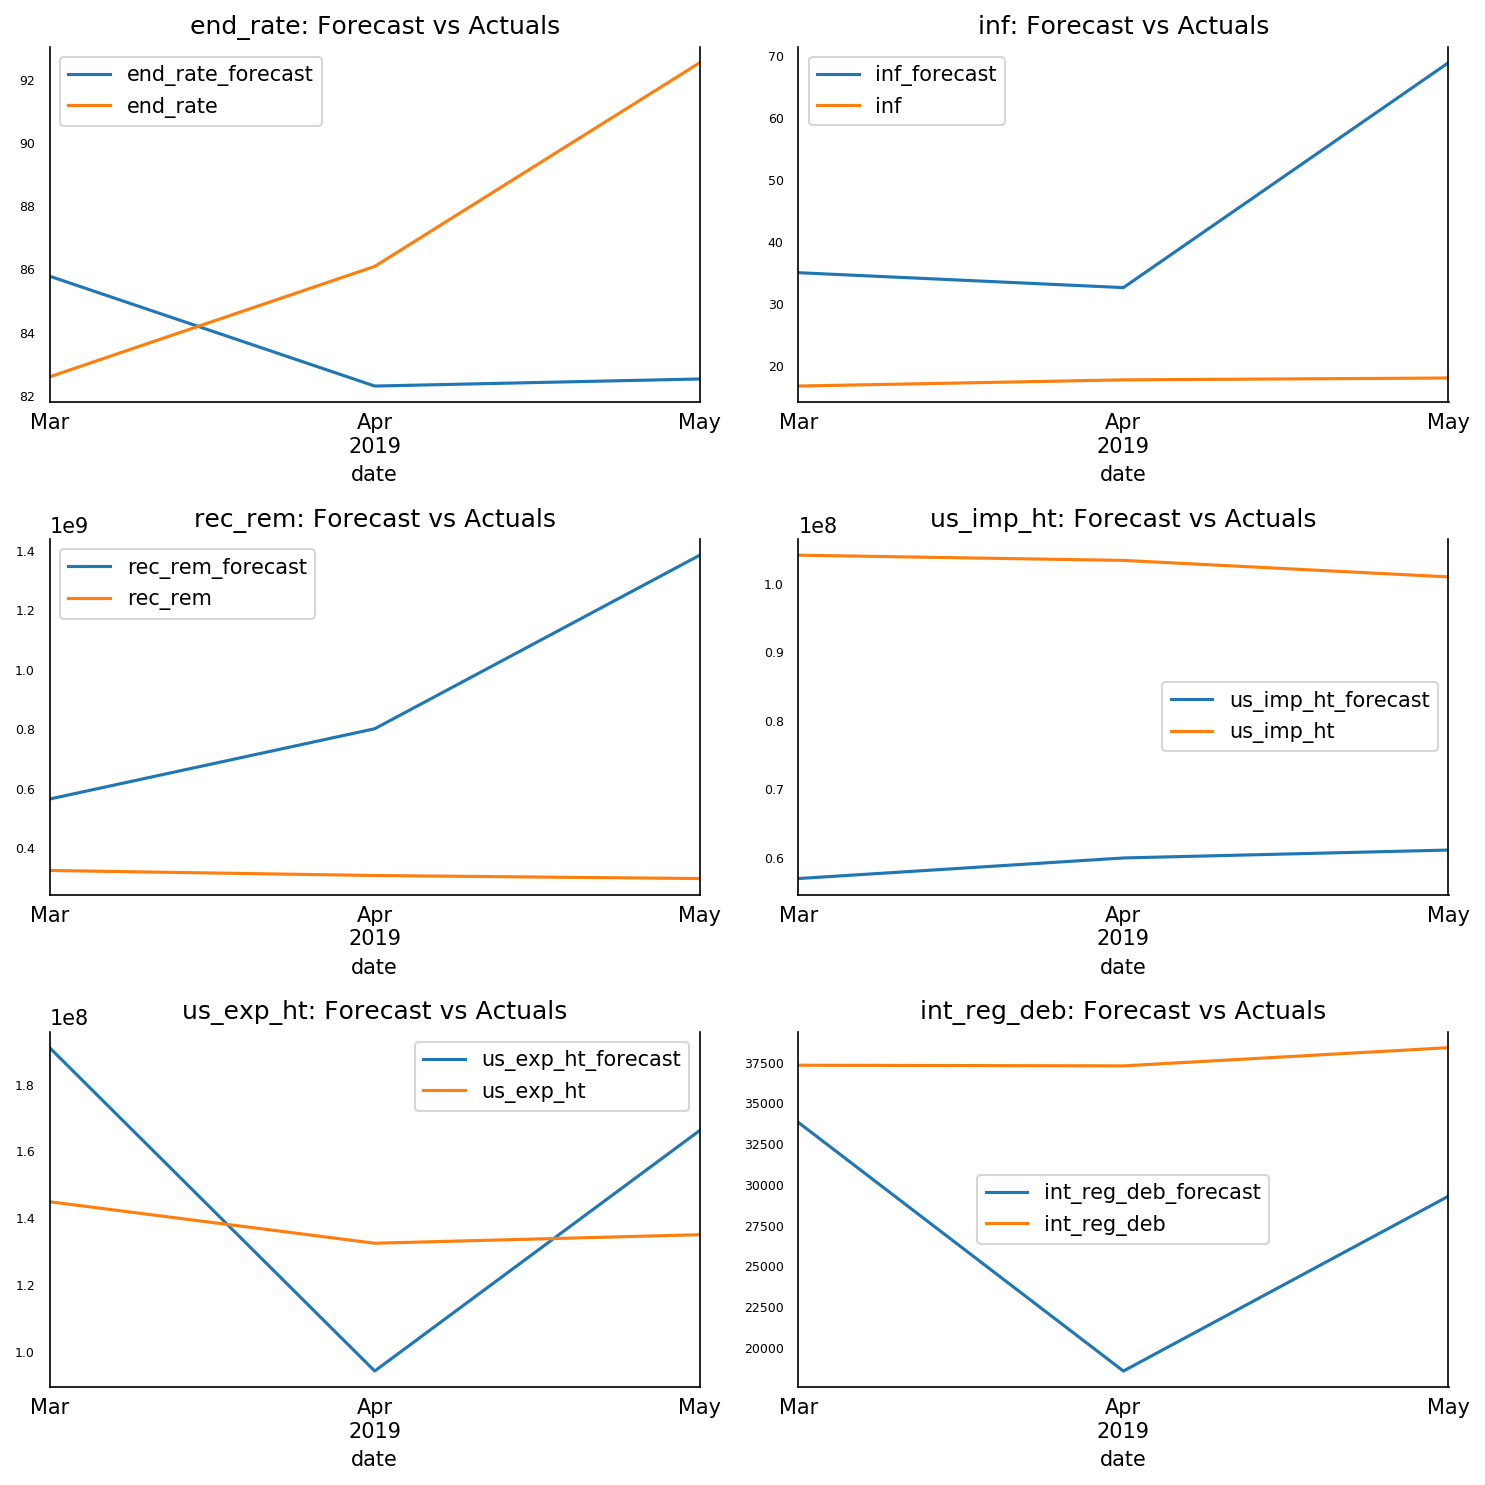

In [368]:
fig, axes = plt.subplots(nrows=int(len(logdf.columns)/2), ncols=2, dpi=150, figsize=(10,10))

for i, (col,ax) in enumerate(zip(logdf.columns, axes.flatten())):
    
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [369]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

for colname in Xtrain.columns:
    print('Forecast Accuracy of: '+ colname)
    accuracy_prod = forecast_accuracy(df_results[colname+'_forecast'].values, df_test[colname])
    for k, v in accuracy_prod.items():
        print(k.rjust(10), ': ', round(v,4))
    print('\n')

Forecast Accuracy of: end_rate
      mape :  0.0635
        me :  -3.5328
       mae :  5.6535
       mpe :  -0.0378
      rmse :  6.4388
      corr :  -0.731
    minmax :  0.063


Forecast Accuracy of: inf
      mape :  1.5909
        me :  28.0764
       mae :  28.0764
       mpe :  1.5909
      rmse :  32.4443
      corr :  0.6338
    minmax :  0.5732


Forecast Accuracy of: rec_rem
      mape :  2.0094
        me :  608275516.0319
       mae :  608275516.0319
       mpe :  2.0094
      rmse :  704703751.8111
      corr :  -0.9277
    minmax :  0.6098


Forecast Accuracy of: us_imp_ht
      mape :  0.4226
        me :  -43509843.799
       mae :  43509843.799
       mpe :  -0.4226
      rmse :  43612725.1982
      corr :  -0.8567
    minmax :  0.4226


Forecast Accuracy of: us_exp_ht
      mape :  0.2792
        me :  13019848.3388
       mae :  38516619.0735
       mpe :  0.0868
      rmse :  38994735.1844
      corr :  0.824
    minmax :  0.2392


Forecast Accuracy of: int_reg_deb

Now let's forcast up to December 2020

In [370]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input2 = X_train.values[-lag_order:]
forecast_input2

4


array([[ 0.03192295, -0.36018689, -0.0051316 ,  0.0346511 , -0.12431616,
         0.7223517 , -0.01739758],
       [ 0.03395199,  0.17342948,  0.34216476,  0.02665698,  0.4736782 ,
        -0.72082496,  0.12018536],
       [ 0.04863956, -0.29601553, -0.11604573, -0.01440081, -0.74726349,
        -0.09596622,  0.27047291],
       [ 0.012138  ,  0.01017644, -0.73168636,  0.06622804,  0.3562997 ,
         0.30905058, -0.79202876]])

In [373]:
# Forecast 
# From Mars 2019 to December 2020, the number of steps forward to predict is 22 months
num_steps = 22
fc2 = model_fitted.forecast(y=forecast_input2, steps=num_steps)
df_forecast2 = pd.DataFrame(fc2, index=pd.date_range(start='Mar 2019', periods = num_steps, freq='M'), 
                            columns=Xtrain.columns)
df_forecast2.index = pd.DatetimeIndex(df_forecast2.index).to_period('M')

df_forecast2

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
2019-03,0.044846,0.630555,0.852117,-0.141273,0.679311,0.356613,1.074311
2019-04,-0.041323,-0.794262,-0.495135,0.051395,-1.427908,-0.599688,-0.524573
2019-05,0.002712,0.820418,0.197724,0.019070,1.273658,0.455984,-0.160630
2019-06,0.047133,-0.483107,0.444147,-0.054284,-0.914817,0.032579,0.827266
2019-07,-0.015298,0.239004,-0.343214,0.093103,0.431469,-0.575468,-0.939010
2019-08,0.020932,0.342453,0.407335,-0.070242,0.304216,0.572072,0.864922
2019-09,-0.010881,-0.699677,-0.799888,0.064990,-1.006916,-0.393245,-1.136775
2019-10,0.002606,0.864430,0.392001,-0.048046,1.336261,0.346766,0.638838
2019-11,0.030633,-0.821022,0.128746,-0.009367,-1.233251,-0.136573,0.330786
2019-12,-0.003991,0.258104,-0.198196,0.042706,0.881836,-0.173321,-0.902787


In [374]:
first_diff2 = np.exp(invert_transform(Xtrain[X_train.columns[:3]], 
                                     df_forecast2[X_train.columns[:3]]))
                    
sec_diff2 = np.exp(invert_transform(Xtrain[X_train.columns[3:]], 
                                   df_forecast2[X_train.columns[3:]], 
                                   second_diff=True))
                    
df_results_final = pd.concat([first_diff2, sec_diff2], axis=1, sort=False)

df_results_final

,end_rate_forecast,us_imp_ht_forecast,int_reg_deb_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,int_reg_emb_forecast
2019-03,85.787122,5.697905e+07,33829.337783,35.027784,5.645332e+08,1.910354e+08,5.992490e+04
2019-04,82.314360,5.998407e+07,18571.719574,32.616160,8.013746e+08,9.427453e+07,6.272661e+04
2019-05,82.537932,6.113892e+07,29301.062367,68.985185,1.386283e+09,1.662715e+08,5.591592e+04
2019-06,86.521348,5.790852e+07,30271.388400,90.005272,3.739029e+09,1.174738e+08,1.139977e+05
2019-07,85.207820,6.355892e+07,17025.890959,149.134498,7.155005e+09,1.277759e+08,9.087619e+04
2019-08,87.010183,5.924759e+07,30168.767103,348.027728,2.057616e+10,1.883979e+08,1.720421e+05
2019-09,86.068566,6.322597e+07,20359.799951,403.444299,2.659080e+10,1.014858e+08,1.045019e+05
2019-10,86.293121,6.026001e+07,28798.651607,1110.121363,5.085602e+10,2.080009e+08,1.202424e+05
2019-11,88.977420,5.969821e+07,25122.301790,1343.977331,1.106285e+11,1.242027e+08,1.925972e+05
2019-12,88.623035,6.230293e+07,21124.539402,2106.234382,1.973860e+11,1.791321e+08,1.250739e+05


In [119]:
imex.tail(10)

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
422,2020-03-31,97.9700,22.0,3.014705e+08,89632097.0,121447966.0,NaN,NaN
423,2020-04-30,102.8348,22.3,NaN,33779661.0,98304938.0,NaN,NaN
424,2020-05-31,108.9426,23.4,NaN,31120985.0,138548968.0,NaN,NaN
425,2020-06-30,113.3133,NaN,NaN,58066942.0,86973292.0,NaN,NaN
426,2020-07-31,119.6463,NaN,NaN,0.0,0.0,NaN,NaN
427,2020-08-31,NaN,NaN,NaN,0.0,0.0,NaN,NaN
428,2020-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN
429,2020-10-31,NaN,NaN,NaN,0.0,0.0,NaN,NaN
430,2020-11-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN
431,2020-12-31,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [375]:
df_results_final.tail(10)

,end_rate_forecast,us_imp_ht_forecast,int_reg_deb_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,int_reg_emb_forecast
2020-03,93.627424,5.766131e+07,31668.836077,11160.765059,1.402528e+12,3.349940e+08,2.493346e+05
2020-04,94.708226,5.965415e+07,23468.409304,11485.866659,2.234110e+12,1.279886e+08,3.127529e+05
2020-05,92.910492,6.232842e+07,23677.617321,22086.390630,3.235811e+12,2.608975e+08,1.911104e+05
2020-06,98.192247,5.670028e+07,27500.812482,36905.365264,9.770763e+12,2.194469e+08,5.897744e+05
2020-07,96.660970,6.306912e+07,20269.971578,43631.529285,1.262973e+13,1.595438e+08,3.049135e+05
2020-08,97.786745,5.666094e+07,31912.270262,126427.272254,3.638808e+13,4.126336e+08,6.375166e+05
2020-09,99.233552,6.039811e+07,20521.461084,124408.955358,4.827934e+13,1.354823e+08,5.685231e+05
2020-10,97.902264,6.086847e+07,27336.791349,323930.247172,7.525396e+13,3.764292e+08,4.266941e+05
2020-11,102.806611,5.671547e+07,29404.716221,488486.944216,2.134667e+14,2.400099e+08,1.258438e+06
2020-12,100.286022,6.337544e+07,18708.865523,616515.476939,2.608808e+14,2.206200e+08,5.334111e+05


### _III.2.- MULTIVARIATE TIME SERIES ANALYSIS (without the Flights Data)_ <a name="multi-anal2"></a>

Most of the considerations we will do in this section will not be much different from those we have already done earlier in section III.1. But the test and the computations must be made again, since we will be using another dataset.

### A. Stationarity <a name="stationarity2"></a>

_**Note:** For all that follows, we will use the `XXtrain` dataset because log transformation is recommended in economic series: the coefficients estimated are elasticities! We won't account for the trend. Its presence in the modelization or not is not important to us. `XXtest` for accuracy testing._

#### 1.- Dickey Fuller's Unit Root (level)

In [376]:
# ADF Test on each column
for name, column in XXtrain.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "end_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7102
 No. Lags Chosen       = 7
 Critical value 1%     = -4.041
 Critical value 5%     = -3.45
 Critical value 10%    = -3.15
 => P-Value = 0.2319. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2617
 No. Lags Chosen       = 13
 Critical value 1%     = -4.046
 Critical value 5%     = -3.452
 Critical value 10%    = -3.152
 => P-Value = 0.4553. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has un

All series but `us_imp_ht` are non-stationary at level when the linear-trend model of Dickey is considered. Let's modelize the no-trend model with a constant and see if any of the others become stationary:

In [377]:
zero_diff = XXtrain.copy().drop(['us_imp_ht'], axis=1)
zero_diff.head()

,end_rate,inf,rec_rem,us_exp_ht
date,,,,
2009-12,3.738129,0.713350,18.813110,17.934373
2010-01,3.655840,1.806148,18.506171,18.205767
2010-02,3.654223,1.644379,18.842875,18.654575
2010-03,3.679223,1.803373,18.829408,18.744883
2010-04,3.676546,1.842532,18.626176,18.572215


In [378]:
# ADF Test on each column
for name, column in zero_diff.iteritems():
    adfuller_test(column, name=column.name, regression='c')
    print('\n')

    Augmented Dickey-Fuller Test on "end_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7102
 No. Lags Chosen       = 7
 Critical value 1%     = -4.041
 Critical value 5%     = -3.45
 Critical value 10%    = -3.15
 => P-Value = 0.2319. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2617
 No. Lags Chosen       = 13
 Critical value 1%     = -4.046
 Critical value 5%     = -3.452
 Critical value 10%    = -3.152
 => P-Value = 0.4553. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has un

All series but `us_imp_ht` (with trend-and-constant) are non-stationary at level when the constant model of Dickey is considered. Let's modelize the no-trend-no-constant model and see if any becomes stationary:

In [379]:
# ADF Test on each column
for name, column in zero_diff.iteritems():
    adfuller_test(column, name=column.name, regression='nc')
    print('\n')

    Augmented Dickey-Fuller Test on "end_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7102
 No. Lags Chosen       = 7
 Critical value 1%     = -4.041
 Critical value 5%     = -3.45
 Critical value 10%    = -3.15
 => P-Value = 0.2319. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2617
 No. Lags Chosen       = 13
 Critical value 1%     = -4.046
 Critical value 5%     = -3.452
 Critical value 10%    = -3.152
 => P-Value = 0.4553. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has un

All series but `us_imp_ht` (with trend and constant) are non-stationary at level when the no-trend-no-constant model of Dickey is considered. Let's compute the first differences and start over the sequential strategy of tests:

#### 2.- Dickey Fuller's Unit Root (first differences)

In [380]:
one_diff = zero_diff.copy().diff().dropna()
one_diff.head()

,end_rate,inf,rec_rem,us_exp_ht
date,,,,
2010-01,-0.082289,1.092798,-0.306939,0.271394
2010-02,-0.001616,-0.161770,0.336704,0.448807
2010-03,0.025000,0.158994,-0.013467,0.090308
2010-04,-0.002677,0.039159,-0.203232,-0.172668
2010-05,0.007132,0.018984,-0.049356,-0.060291


In [381]:
for name, column in one_diff.iteritems():
    adfuller_test(column, name=column.name, regression='ct')
    print('\n')

    Augmented Dickey-Fuller Test on "end_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.4239
 No. Lags Chosen       = 0
 Critical value 1%     = -4.037
 Critical value 5%     = -3.448
 Critical value 10%    = -3.149
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.025
 No. Lags Chosen       = 11
 Critical value 1%     = -4.045
 Critical value 5%     = -3.452
 Critical value 10%    = -3.151
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "rec_rem" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level  

+ `us_imp_ht` is level and constant-and-trend stationary.
+ All other variables are first-difference and constant-and-trend stationary.

Now let's combine the differenced series with the `us_imp_ht` in one dataframe.

In [382]:
XX_train = pd.concat([one_diff, XXtrain.loc[:,'us_imp_ht']], axis=1, sort=False).dropna()
XX_train.head()

,end_rate,inf,rec_rem,us_exp_ht,us_imp_ht
date,,,,,
2010-01,-0.082289,1.092798,-0.306939,0.271394,15.671986
2010-02,-0.001616,-0.161770,0.336704,0.448807,17.196369
2010-03,0.025000,0.158994,-0.013467,0.090308,17.612866
2010-04,-0.002677,0.039159,-0.203232,-0.172668,17.645709
2010-05,0.007132,0.018984,-0.049356,-0.060291,17.663704


### B. Long Term Correlations <a name="granger-johansen"></a>

_**Note:** In all that follows, the `XX_train` transformed table will be used._

#### 1. Granger's Pairwise Causality

A time series is often correlated with another series' lags. Granger's pairwise causality tests detect up to which period this correlation stands, or if there is any current correlation at all between both series.

In [383]:
XX_train.shape

(120, 5)

In [384]:


grangers_causation_matrix(XX_train, variables = XX_train.columns)     

,end_rate_x,inf_x,rec_rem_x,us_exp_ht_x,us_imp_ht_x
end_rate_y,1.0000,0.6388,0.2992,0.0593,0.3142
inf_y,0.0357,1.0000,0.0363,0.1460,0.3636
rec_rem_y,0.6795,0.4064,1.0000,0.0035,0.0000
us_exp_ht_y,0.0373,0.0654,0.0189,1.0000,0.0000
us_imp_ht_y,0.5152,0.2251,0.0000,0.0623,1.0000


**Results:**

+ `d(inf_y)` = `d(end_rate_x)` + `d(rec_rem_x)`


+ `d(rec_rem_y)` = `d(us_exp_ht_x)` + `d^2(us_imp_ht_x)`


+ `d(us_exp_ht_y)` = `d(end_rate_x)` + `d(rec_rem_x)` + `d^2(us_imp_ht_x)`


+ `d^2(us_imp_ht_x)` = `d(rec_rem_x)`


Not enough variables are causing each other, when the period going from June 2019 to December 2020 has been added. This makes the system as a whole a lesser good candidate for the VAR, with a stronger exogeneity for the `end_rate` variable. We may still explore the cointegration inside.

#### 2. Johansen's Cointegration Test

while causality indicates either X is causing Y or either Y is causing X or either of both variables are casuing each other, cointegration tells us whether there exists a long and/or a short term relation among a subset of a set of variables.

In [385]:
cointegration_test(XX_train, max_lag=12)

     Name       ::  Test Stat > C(95%)    =>   Signif  
 ------------------------------------------------------------
       end_rate ::  89.07     > 60.0627   =>   True
            inf ::  54.99     > 40.1749   =>   True
        rec_rem ::  29.17     > 24.2761   =>   True
      us_exp_ht ::  14.24     > 12.3212   =>   True
      us_imp_ht ::  4.11      > 4.1296    =>   False


Up to 12 lags, all series are cointegrated: (r-1 = 5-1) = 4 relations of cointegration at most. We may then use the whole system to estimate the VAR.

### C. Modelling & Forecasting  <a name="model-predict2"></a>

#### 1. Fitting the VAR estimation

In [386]:
from statsmodels.tsa.api import VAR

model3 = VAR(XX_train)

The first time there was a dramatic spike in the exchange rate was after the crisis of July 2018. We will use this period length (18) as the maximum lags and test the number of acceptable lags

In [387]:
model3.select_order(maxlags=12).summary()

,AIC,BIC,FPE,HQIC
0,-22.03,-21.91,2.704e-10,-21.98
1,-23.15,-22.41*,8.828e-11,-22.85
2,-23.34,-21.97,7.336e-11,-22.79
3,-23.38,-21.39,7.109e-11,-22.57
4,-23.43,-20.82,6.850e-11,-22.37
5,-23.44,-20.21,6.959e-11,-22.13
6,-23.43,-19.58,7.237e-11,-21.87
7,-23.62,-19.15,6.283e-11,-21.81
8,-24.02,-18.93,4.517e-11,-21.96
9,-24.03,-18.31,4.917e-11,-21.71


In [388]:
model_fitted3 = model3.fit(12)
model_fitted3.summary()
# Lot of coefficients will be estimated and we are not interested in knowing them all, 
# since python can do the calculations

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, Aug, 2020
Time:                     15:13:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -18.3622
Nobs:                     108.000    HQIC:                  -22.8656
Log likelihood:           939.360    FPE:                1.15287e-11
AIC:                     -25.9368    Det(Omega_mle):     1.22876e-12
--------------------------------------------------------------------
Results for equation end_rate
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.975399         0.498839           -1.955           0.051
L1.end_rate           0.302994         0.143090            2.118           0.034
L1.inf               -0.043170         0.030176          

In [389]:
model3 = VAR(XX_train)
model3.select_order(maxlags=12).summary()

,AIC,BIC,FPE,HQIC
0,-22.03,-21.91,2.704e-10,-21.98
1,-23.15,-22.41*,8.828e-11,-22.85
2,-23.34,-21.97,7.336e-11,-22.79
3,-23.38,-21.39,7.109e-11,-22.57
4,-23.43,-20.82,6.850e-11,-22.37
5,-23.44,-20.21,6.959e-11,-22.13
6,-23.43,-19.58,7.237e-11,-21.87
7,-23.62,-19.15,6.283e-11,-21.81
8,-24.02,-18.93,4.517e-11,-21.96
9,-24.03,-18.31,4.917e-11,-21.71


In [390]:
model_fitted3 = model3.fit(12)
model_fitted3.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, Aug, 2020
Time:                     15:13:09
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -18.3622
Nobs:                     108.000    HQIC:                  -22.8656
Log likelihood:           939.360    FPE:                1.15287e-11
AIC:                     -25.9368    Det(Omega_mle):     1.22876e-12
--------------------------------------------------------------------
Results for equation end_rate
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.975399         0.498839           -1.955           0.051
L1.end_rate           0.302994         0.143090            2.118           0.034
L1.inf               -0.043170         0.030176          

#### 2. Forecasts & Evaluation

In [391]:
# Get the lag order
lag_order3 = model_fitted3.k_ar
print(lag_order3)  #> 4

# Input data for forecasting
forecast_input3 = XX_train.values[-lag_order3:]
forecast_input3

12


array([[ 4.86395621e-02,  2.61452801e-02, -3.62951711e-01,
        -2.66701894e-01,  1.79892907e+01],
       [ 1.21379975e-02,  9.23733201e-02, -6.65201012e-03,
         4.23486821e-02,  1.79994672e+01],
       [ 7.06066797e-03, -1.78046246e-02,  2.89854153e-01,
         4.45458536e-01,  1.84617222e+01],
       [ 4.13805866e-02,  5.81559202e-02, -5.40006304e-02,
        -8.95260811e-02,  1.84543588e+01],
       [ 7.21293211e-02,  1.68071183e-02, -3.39341397e-02,
         1.90710161e-02,  1.84307984e+01],
       [ 5.28128875e-03,  3.27898228e-02, -1.26031337e-01,
        -2.71561378e-01,  1.81471016e+01],
       [ 2.51549502e-03,  2.65267543e-02,  5.95745509e-02,
         1.39532894e-01,  1.86438789e+01],
       [ 1.38655854e-03,  2.07261305e-02,  2.98103050e-02,
        -1.62796508e-02,  1.83422494e+01],
       [-7.83051423e-04,  1.02041702e-02, -1.82041488e-01,
        -1.45201819e-01,  1.82312177e+01],
       [-1.69709269e-02,  1.51136378e-02, -1.25364970e-04,
        -5.61048727e-01

In [392]:
# Forecast
nobs3 = len(XXtest)
fc3 = model_fitted3.forecast(y=forecast_input3, steps=nobs3)
df_forecast3 = pd.DataFrame(fc3, index=XXtest.index[-nobs3:], columns=XX_train.columns)
df_forecast3

,end_rate,inf,rec_rem,us_exp_ht,us_imp_ht
date,,,,,
2020-01,0.003955,0.249928,-0.295645,0.237909,17.690764
2020-02,0.051277,0.091354,-0.042165,-0.430242,17.876659
2020-03,0.019233,0.269788,0.385584,0.463076,18.137375


In [393]:
first_diff_ = np.exp(invert_transform(XXtrain.drop('us_imp_ht', axis=1), df_forecast3.drop('us_imp_ht', axis=1)))

zero_diff_ = np.exp(df_forecast3[['us_imp_ht']])
zero_diff_.rename(columns={'us_imp_ht': 'us_imp_ht_forecast'}, inplace=True)

df_results3 = pd.concat([first_diff_, zero_diff_], axis=1, sort=False)
df_results3

,end_rate_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,us_imp_ht_forecast
date,,,,,
2020-01,92.348738,26.705796,2.755873e+08,1.154443e+08,4.819489e+07
2020-02,97.207649,29.260380,2.642089e+08,7.507938e+07,5.804096e+07
2020-03,99.095359,38.321940,3.885119e+08,1.192976e+08,7.532892e+07


In [394]:
df_test3 = np.exp(XXtest)
df_test3

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht
date,,,,,
2020-01,92.7940,20.7,2.518831e+08,57704363.0,95754798.0
2020-02,94.7716,20.8,2.725441e+08,79661596.0,100645336.0
2020-03,97.9700,22.0,3.014705e+08,89632097.0,121447966.0


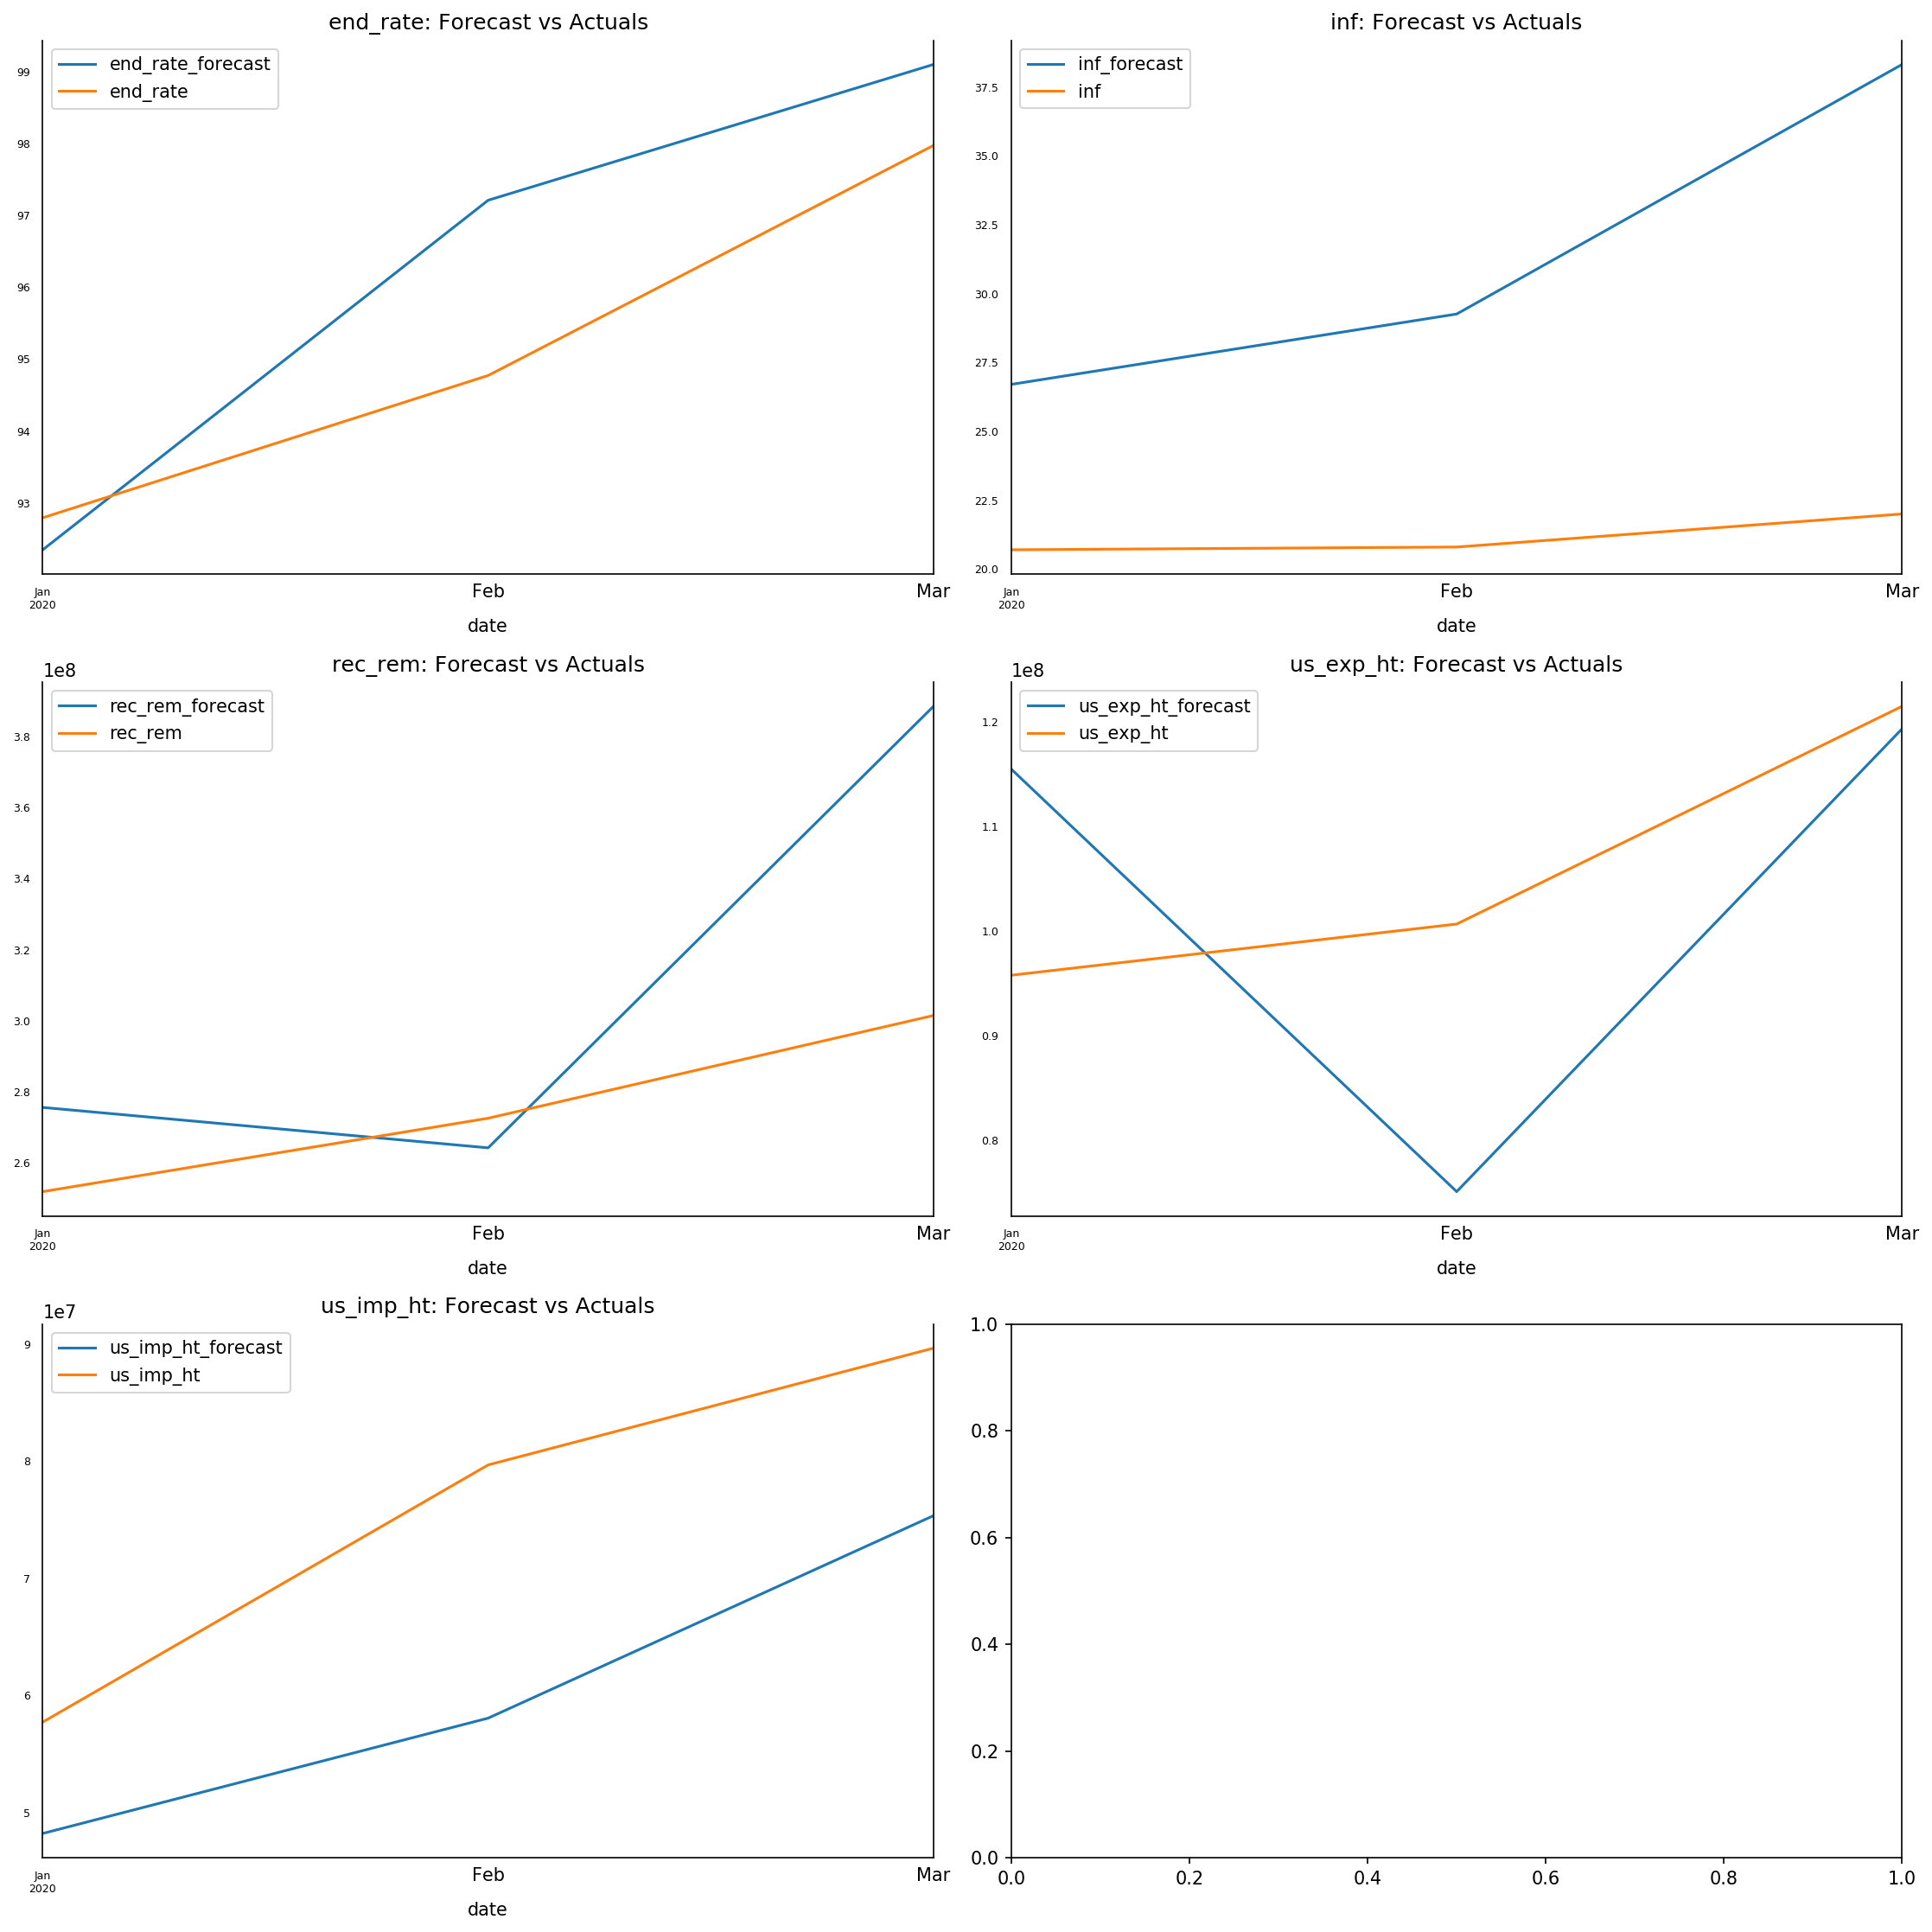

In [395]:
fig, axes = plt.subplots(nrows=int(((len(XX_train.columns)+1)/2)), ncols=2, dpi=150, figsize=(15,15))

for i, (col,ax) in enumerate(zip(XX_train.columns, axes.flatten())):
    
    df_results3[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test3[col][-nobs:].plot(legend=True, ax=ax);
    
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [396]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

for colname in XX_train.columns:
    print('Forecast Accuracy of: '+ colname)
    accuracy_prod = forecast_accuracy(df_results3[colname+'_forecast'].values, df_test3[colname])
    for k, v in accuracy_prod.items():
        print(k.rjust(10), ': ', round(v,4))
    print('\n')

Forecast Accuracy of: end_rate
      mape :  0.014
        me :  1.0387
       mae :  1.3356
       mpe :  0.0108
      rmse :  1.5705
      corr :  0.9271
    minmax :  0.0137


Forecast Accuracy of: inf
      mape :  0.4796
        me :  10.2627
       mae :  10.2627
       mpe :  0.4796
      rmse :  11.1662
      corr :  0.99
    minmax :  0.3133


Forecast Accuracy of: rec_rem
      mape :  0.1378
        me :  34136814.3684
       mae :  39693618.6231
       mpe :  0.1174
      rmse :  52305429.1212
      corr :  0.8725
    minmax :  0.1135


Forecast Accuracy of: us_exp_ht
      mape :  0.1591
        me :  -2675610.8801
       mae :  15801918.6313
       mpe :  -0.022
      rmse :  18671877.619
      corr :  0.4097
    minmax :  0.1474


Forecast Accuracy of: us_imp_ht
      mape :  0.1986
        me :  -15144428.3367
       mae :  15144428.3367
       mpe :  -0.1986
      rmse :  15942217.8495
      corr :  0.9321
    minmax :  0.1986




Now let's forcast up to December 2020

In [397]:
# Forecast 
# From Jan 2020 to December 2020, the number of steps forward to predict is 12 months
num_steps = 12
fc4 = model_fitted3.forecast(y=forecast_input3, steps=num_steps)
df_forecast4 = pd.DataFrame(fc4, index=pd.date_range(start='Jan 2020', periods = num_steps, freq='M'), 
                            columns=XX_train.columns)
df_forecast4.index = pd.DatetimeIndex(df_forecast4.index).to_period('M')

df_forecast4

,end_rate,inf,rec_rem,us_exp_ht,us_imp_ht
2020-01,0.003955,0.249928,-0.295645,0.237909,17.690764
2020-02,0.051277,0.091354,-0.042165,-0.430242,17.876659
2020-03,0.019233,0.269788,0.385584,0.463076,18.137375
2020-04,0.018064,0.147694,-0.046650,0.355132,18.330919
2020-05,0.001475,0.141902,-0.071970,-0.327840,18.229366
2020-06,0.042178,-0.041757,-0.186198,-0.058702,18.419295
2020-07,0.003494,-0.022895,0.143404,0.206319,18.668506
2020-08,-0.032897,-0.067835,-0.014392,0.044067,18.545958
2020-09,0.010563,-0.146511,-0.220784,-0.373928,18.357128
2020-10,0.017412,-0.184089,-0.042645,-0.065248,18.261464


In [398]:
df_results_final2 = np.exp(invert_transform(XXtrain, df_forecast4))

df_results_final2

,end_rate_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,us_imp_ht_forecast
2020-01,92.348738,26.705796,2.755873e+08,1.154443e+08,4.029326e+15
2020-02,97.207649,29.260380,2.642089e+08,7.507938e+07,2.338659e+23
2020-03,99.095359,38.321940,3.885119e+08,1.192976e+08,1.761687e+31
2020-04,100.901659,44.421199,3.708043e+08,1.701624e+08,1.610444e+39
2020-05,101.050647,51.193814,3.450551e+08,1.225983e+08,1.330022e+47
2020-06,105.403949,49.100143,2.864334e+08,1.156087e+08,1.328180e+55
2020-07,105.772865,47.988779,3.306002e+08,1.420999e+08,1.701713e+63
2020-08,102.349858,44.841405,3.258764e+08,1.485018e+08,1.928828e+71
2020-09,103.436738,38.730260,2.613171e+08,1.021732e+08,1.810059e+79
2020-10,105.253503,32.218214,2.504075e+08,9.571944e+07,1.543639e+87


In [399]:
df_results_final.tail(10)

,end_rate_forecast,us_imp_ht_forecast,int_reg_deb_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,int_reg_emb_forecast
2020-03,93.627424,5.766131e+07,31668.836077,11160.765059,1.402528e+12,3.349940e+08,2.493346e+05
2020-04,94.708226,5.965415e+07,23468.409304,11485.866659,2.234110e+12,1.279886e+08,3.127529e+05
2020-05,92.910492,6.232842e+07,23677.617321,22086.390630,3.235811e+12,2.608975e+08,1.911104e+05
2020-06,98.192247,5.670028e+07,27500.812482,36905.365264,9.770763e+12,2.194469e+08,5.897744e+05
2020-07,96.660970,6.306912e+07,20269.971578,43631.529285,1.262973e+13,1.595438e+08,3.049135e+05
2020-08,97.786745,5.666094e+07,31912.270262,126427.272254,3.638808e+13,4.126336e+08,6.375166e+05
2020-09,99.233552,6.039811e+07,20521.461084,124408.955358,4.827934e+13,1.354823e+08,5.685231e+05
2020-10,97.902264,6.086847e+07,27336.791349,323930.247172,7.525396e+13,3.764292e+08,4.266941e+05
2020-11,102.806611,5.671547e+07,29404.716221,488486.944216,2.134667e+14,2.400099e+08,1.258438e+06
2020-12,100.286022,6.337544e+07,18708.865523,616515.476939,2.608808e+14,2.206200e+08,5.334111e+05


In [400]:
imex[420:426]

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
420,2020-01-31,92.7940,20.7,2.518831e+08,57704363.0,95754798.0,NaN,NaN
421,2020-02-29,94.7716,20.8,2.725441e+08,79661596.0,100645336.0,NaN,NaN
422,2020-03-31,97.9700,22.0,3.014705e+08,89632097.0,121447966.0,NaN,NaN
423,2020-04-30,102.8348,22.3,NaN,33779661.0,98304938.0,NaN,NaN
424,2020-05-31,108.9426,23.4,NaN,31120985.0,138548968.0,NaN,NaN
425,2020-06-30,113.3133,NaN,NaN,58066942.0,86973292.0,NaN,NaN


According to last data we have for the exchange rate, we can see that from May 2020 on, the model doesn't manage to predict the exchange rate with accuracy. It fails to predict the inflation, the US Imports and Exports. It predicts the transfers with more or less accuracy. 

In [401]:
df_results_final.tail(24)

,end_rate_forecast,us_imp_ht_forecast,int_reg_deb_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,int_reg_emb_forecast
2019-03,85.787122,5.697905e+07,33829.337783,35.027784,5.645332e+08,1.910354e+08,5.992490e+04
2019-04,82.314360,5.998407e+07,18571.719574,32.616160,8.013746e+08,9.427453e+07,6.272661e+04
2019-05,82.537932,6.113892e+07,29301.062367,68.985185,1.386283e+09,1.662715e+08,5.591592e+04
2019-06,86.521348,5.790852e+07,30271.388400,90.005272,3.739029e+09,1.174738e+08,1.139977e+05
2019-07,85.207820,6.355892e+07,17025.890959,149.134498,7.155005e+09,1.277759e+08,9.087619e+04
2019-08,87.010183,5.924759e+07,30168.767103,348.027728,2.057616e+10,1.883979e+08,1.720421e+05
2019-09,86.068566,6.322597e+07,20359.799951,403.444299,2.659080e+10,1.014858e+08,1.045019e+05
2019-10,86.293121,6.026001e+07,28798.651607,1110.121363,5.085602e+10,2.080009e+08,1.202424e+05
2019-11,88.977420,5.969821e+07,25122.301790,1343.977331,1.106285e+11,1.242027e+08,1.925972e+05
2019-12,88.623035,6.230293e+07,21124.539402,2106.234382,1.973860e+11,1.791321e+08,1.250739e+05


In [402]:
df_results_final2

,end_rate_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,us_imp_ht_forecast
2020-01,92.348738,26.705796,2.755873e+08,1.154443e+08,4.029326e+15
2020-02,97.207649,29.260380,2.642089e+08,7.507938e+07,2.338659e+23
2020-03,99.095359,38.321940,3.885119e+08,1.192976e+08,1.761687e+31
2020-04,100.901659,44.421199,3.708043e+08,1.701624e+08,1.610444e+39
2020-05,101.050647,51.193814,3.450551e+08,1.225983e+08,1.330022e+47
2020-06,105.403949,49.100143,2.864334e+08,1.156087e+08,1.328180e+55
2020-07,105.772865,47.988779,3.306002e+08,1.420999e+08,1.701713e+63
2020-08,102.349858,44.841405,3.258764e+08,1.485018e+08,1.928828e+71
2020-09,103.436738,38.730260,2.613171e+08,1.021732e+08,1.810059e+79
2020-10,105.253503,32.218214,2.504075e+08,9.571944e+07,1.543639e+87


In [403]:
imex.tail(24)

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
408,2019-01-31,81.0353,15.5,2.440045e+08,64960550.0,88983423.0,49225.0,56085.0
409,2019-02-28,82.0249,17.0,2.423867e+08,65624992.0,92832684.0,23682.0,33880.0
410,2019-03-31,82.6061,16.7,3.238851e+08,104189527.0,144930934.0,37335.0,38839.0
411,2019-04-30,86.0961,17.7,3.068589e+08,103425157.0,132519689.0,37295.0,38291.0
412,2019-05-31,92.5356,18.0,2.966206e+08,101016899.0,135071227.0,38412.0,46107.0
413,2019-06-30,93.0256,18.6,2.614969e+08,76065213.0,102949736.0,NaN,NaN
414,2019-07-31,93.2599,19.1,2.775489e+08,125006832.0,118365082.0,NaN,NaN
415,2019-08-31,93.3893,19.5,2.859473e+08,92456554.0,116453740.0,NaN,NaN
416,2019-09-30,93.3162,19.7,2.383561e+08,82740327.0,100714753.0,NaN,NaN
417,2019-10-31,91.7459,20.0,2.383263e+08,86539645.0,57468879.0,NaN,NaN


In [404]:
arr = imex.loc[408:426][imex.columns[1]].values
arr

array([ 81.0353,  82.0249,  82.6061,  86.0961,  92.5356,  93.0256,
        93.2599,  93.3893,  93.3162,  91.7459,  91.7155,  91.9842,
        92.794 ,  94.7716,  97.97  , 102.8348, 108.9426, 113.3133,
       119.6463])

In [406]:
df_results_final

,end_rate_forecast,us_imp_ht_forecast,int_reg_deb_forecast,inf_forecast,rec_rem_forecast,us_exp_ht_forecast,int_reg_emb_forecast
2019-03,85.787122,5.697905e+07,33829.337783,35.027784,5.645332e+08,1.910354e+08,5.992490e+04
2019-04,82.314360,5.998407e+07,18571.719574,32.616160,8.013746e+08,9.427453e+07,6.272661e+04
2019-05,82.537932,6.113892e+07,29301.062367,68.985185,1.386283e+09,1.662715e+08,5.591592e+04
2019-06,86.521348,5.790852e+07,30271.388400,90.005272,3.739029e+09,1.174738e+08,1.139977e+05
2019-07,85.207820,6.355892e+07,17025.890959,149.134498,7.155005e+09,1.277759e+08,9.087619e+04
2019-08,87.010183,5.924759e+07,30168.767103,348.027728,2.057616e+10,1.883979e+08,1.720421e+05
2019-09,86.068566,6.322597e+07,20359.799951,403.444299,2.659080e+10,1.014858e+08,1.045019e+05
2019-10,86.293121,6.026001e+07,28798.651607,1110.121363,5.085602e+10,2.080009e+08,1.202424e+05
2019-11,88.977420,5.969821e+07,25122.301790,1343.977331,1.106285e+11,1.242027e+08,1.925972e+05
2019-12,88.623035,6.230293e+07,21124.539402,2106.234382,1.973860e+11,1.791321e+08,1.250739e+05


In [411]:
imex

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
0,1985-01-31,NaN,NaN,NaN,31200000.0,31200000.0,NaN,NaN
1,1985-02-28,NaN,NaN,NaN,30400000.0,31800000.0,NaN,NaN
2,1985-03-31,NaN,NaN,NaN,36700000.0,31900000.0,NaN,NaN
3,1985-04-30,NaN,NaN,NaN,33200000.0,32900000.0,NaN,NaN
4,1985-05-31,NaN,NaN,NaN,31000000.0,35300000.0,NaN,NaN
5,1985-06-30,NaN,NaN,NaN,39600000.0,28800000.0,NaN,NaN
6,1985-07-31,NaN,NaN,NaN,30200000.0,33300000.0,NaN,NaN
7,1985-08-31,NaN,NaN,NaN,30600000.0,34400000.0,NaN,NaN
8,1985-09-30,NaN,NaN,NaN,27200000.0,29700000.0,NaN,NaN
9,1985-10-31,NaN,NaN,NaN,32400000.0,45100000.0,NaN,NaN


In [412]:
dfplot = df_results_final[['end_rate_forecast']]

dfplot['end_rate_forecast_model2'] = np.nan 
dfplot.loc['2020-01-31':, 'end_rate_forecast_model2'] = df_results_final2['end_rate_forecast']

dfplot['end_rate_actuals'] = np.nan
dfplot.loc[:'2020-07-31', 'end_rate_actuals'] = imex.loc[410:426][imex.columns[1]].values

C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Grégory PINCHINAT\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [413]:
dfplot

,end_rate_forecast,end_rate_forecast_model2,end_rate_actuals
2019-03,85.787122,NaN,82.6061
2019-04,82.314360,NaN,86.0961
2019-05,82.537932,NaN,92.5356
2019-06,86.521348,NaN,93.0256
2019-07,85.207820,NaN,93.2599
2019-08,87.010183,NaN,93.3893
2019-09,86.068566,NaN,93.3162
2019-10,86.293121,NaN,91.7459
2019-11,88.977420,NaN,91.7155
2019-12,88.623035,NaN,91.9842


Text(0.5, 1.0, 'Value of 1 U$D in Gourdes at the end of every month')

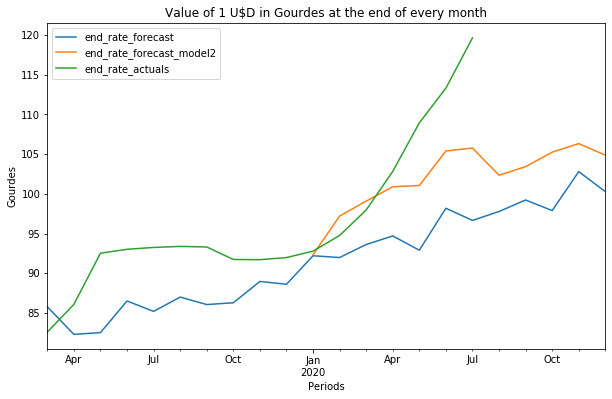

In [416]:
dfplot.plot(kind='line', figsize=(10,6))
plt.ylabel('Gourdes')
plt.xlabel('Periods')
plt.title('Value of 1 U$D in Gourdes at the end of every month')

([<matplotlib.axis.YTick at 0x1880b241a88>,
 <a list of 31 Text yticklabel objects>)

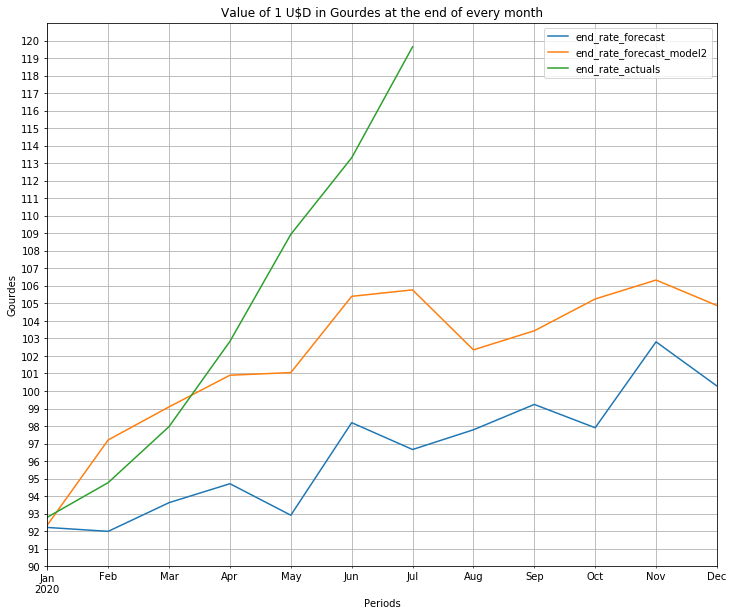

In [436]:
dfplot.loc['2020':].plot(kind='line', figsize=(12,10))
plt.ylabel('Gourdes')
plt.xlabel('Periods')
plt.title('Value of 1 U$D in Gourdes at the end of every month')
plt.grid()
plt.grid(which='minor')
plt.yticks(ticks=np.arange(90, 121, 1))

Model 2 is faring better at predicting the exchange rate in 2020, but it is failing at making precise predictions beyond May. A set of factors have caused the exchange rate to spike dramatically and in an unusual way since January 2020. The factors included in Model 2 don't seem to be able to capture those changes from May 2020 and beyond. We could probably improve the first model to predict better values in 2020 if we had the Flights Data from May 2019 to date.